# Desarrollo de modelos computacionales para dataset Quality Wine
 

Para ver un corto vídeo de sustentanción de este proyecto el 14 de Mayo de 2021 de click [aquí](https://youtu.be/ofxbbeg33X0).

## 1. Entendimiento del negocio

La industria de los vinos ha mostrado un crecimiento significativo en las últimas decadas, es por eso que nuevas tecnologías han sido aplicadas con la finalidad de apoyar este crecimiento tanto para la elaboración como para la venta de productos. 

Durante la etapa de la producción diversos factores pueden ser modificados tales como : acidez, concentración de azúcares, temperatura, especie de levadura, presencia de aire. Combinaciones de estas condiciones pueden conllevar a la elaboración de vinos de menor o mayor calidad.
Cabe tener en cuenta que la calidad de un vino influencia directamente el valor del mismo, por lo que clasificar diferentes lotes o cosechas es una tarea importante a la hora de comercializar el producto. Así mismo, el seguimiento de propiedades fisicoquímicas es un factor de vital importancia a la hora de elaborar vinos y su entendimiento puede ayudar en la guia de fabricación de vinos de mejor calidad.

La calidad del vino puede ser evaluada de dos formas, la primera es el análisis fisicoquímico, en este proceso se emplean diversas técnicas químicas como cromatografia, espectroscopia y electroquímica para determinar la concentración de ciertos analitos en las muestras. Por otro lado, se puede hacer un análisis sensorial de los vinos, este se encuentra a cargo de catadores expertos que pueden calificar los vinos de acuerdo a su perfil sensorial. La evaluación de calidad usando las propiedades fisicoquímicas es sin duda la más costo-efectiva, ya que no se requiere de catadores expertos, los resultados son rápidos, son cuantitativos y existe una amplia cantidad de propiedades a evaluar. Sin embargo, sin el entendimiento de las propiedades sensoriales es imposible correlacionar la presencia o concentración de diversos analitos con su calidad. Es por eso que la combinación entre el análisis químico y el análisis sensorial resulta en poderosa unión.


### **1.1 Objetivos del negocio**



1.   Relacionar variables cuantitativas producto del análisis químico con la calidad de un vino.
2.   A partir de los modelos y análisis realizado se espera optimizar el proceso de elaboración para obtener vinos de alta calidad manteniendo el margen de rentabilidad.




### **1.2 Metas del proyecto de Machine Learning**



1.   Crear modelos de aprendizaje no supervisado como PCA y K-Means que permitan entender patrones y relaciones presentes en los datos.
2.   Crear modelos de aprendizaje supervisado que permitan predecir la calidad de un vino a partir de sus propiedades fisicoquímicas.



## **2. Entendimiento de los datos**
---

El conjunto de datos está compuesto por 6497 observaciones, 1599 de vino rojo y 4898 de vino blanco.

In [ ]:
# Librerías básicas NumPy, Pandas, Matplotlib y Seaborn.

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Actualizar scikit-learn a la última versión

!pip install -U scikit-learn 

# Importar scikit-learn 
import sklearn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [ ]:
# Configuraciones para las librerías y módulos usados.

# Ignorar las advertencias o warnings.

import warnings
warnings.simplefilter(action='ignore')

# Configurar el formato por defecto de la 
# librería de visualización Matplotlib.

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 105
mpl.rcParams['figure.figsize'] = (9, 7)
sns.set_theme()

### **2.1 Data Frame: Origen y descripción de los datos**
-----
Los conjunto de datos **`red`** y **`white`** fueron obtenidos de la base de datos para aprendizaje de maquina de la Universidad de California en Irvine (UCI Machine Learning Repository). 

El conjunto de datos consta de atributos multivariados que sirven para entrener clacificadores. Tiene un total de 178 ejemplo, en 13 variables. 

**Tabla 1. Atributos de interes dentro del Dataset**

| Variable | Definición	| Valores | 
| --- | --- | --- |
fixed acidity| non-volatile acids that do not evaporate| float
volatile acidity|  acetic acid in wine which leads to an unpleasant vinegar taste| float
citric acid| preservative to increase acidity. When in small quantities, adds freshness and flavor to wines| float
residual sugar|sugar remaining after fermentation stops| float (ideal > 45 g/L)|float
chlorides|amount of "salt" in the wine|float
free sulfur dioxide|prevents microbial growth and the oxidation of wine| float
total sulfur dioxide|amount of free + bound forms of SO2| float
density|
pH|level of acidity on a scale of 0–14|float
sulphates| additive that contributes to SO2 levels| float
alcohol|
quality|which is the output variable/predicto|integer


Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.



In [ ]:
red = pd.read_csv('', sep = ';')
red.head(5)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [ ]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red.describe().loc[['mean', 'min', 'max'], :]

fixed acidity  volatile acidity  ...    alcohol   quality
mean       8.319637          0.527821  ...  10.422983  5.636023
min        4.600000          0.120000  ...   8.400000  3.000000
max       15.900000          1.580000  ...  14.900000  8.000000

[3 rows x 12 columns]

In [ ]:
white = pd.read_csv('https://raw.githubusercontent.com/HarryVargas96/Wine-quality/main/winequality-white.csv', sep = ';')
white.head(5)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]

In [ ]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
white.describe().loc[['mean', 'min', 'max'], :]

fixed acidity  volatile acidity  ...    alcohol   quality
mean       6.854788          0.278241  ...  10.514267  5.877909
min        3.800000          0.080000  ...   8.000000  3.000000
max       14.200000          1.100000  ...  14.200000  9.000000

[3 rows x 12 columns]

### **2.2 Data Frame: Descripcion de los datos**
-----

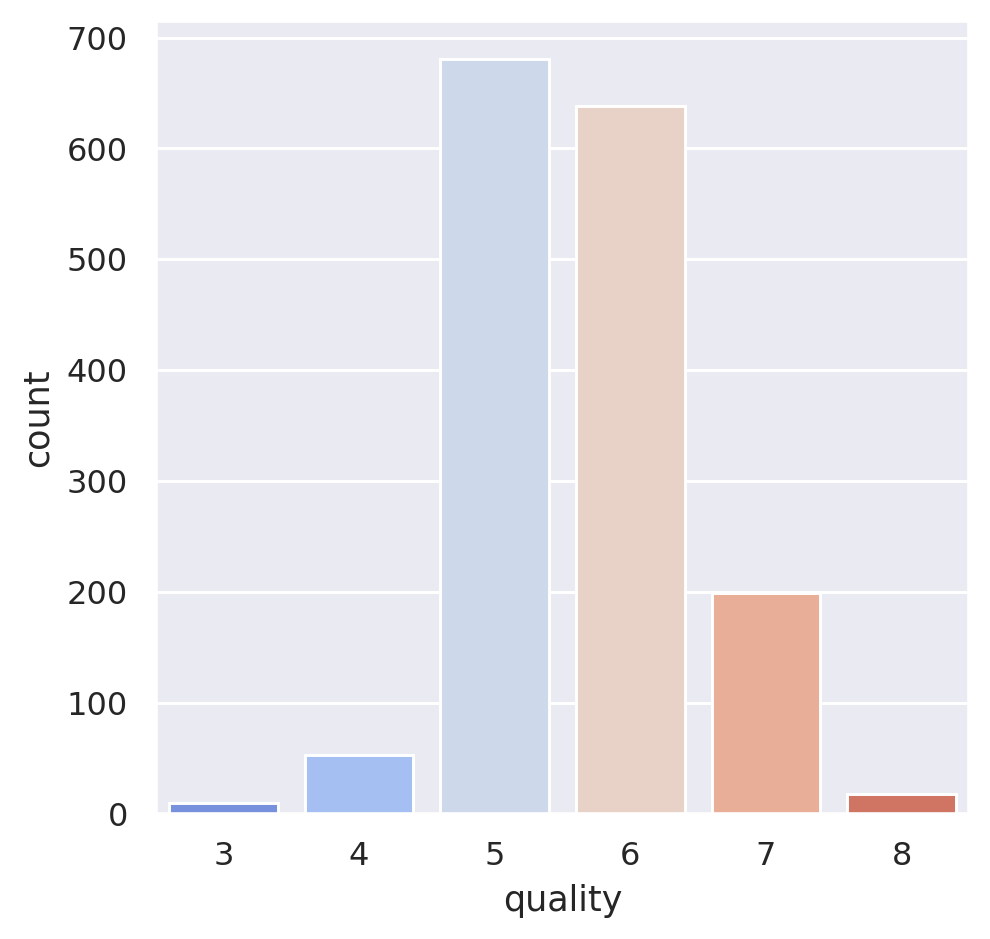

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot('quality', data=red, palette='coolwarm')

La figura muestra que hay diferencias apreciables en la cantidad de ejemplos para cada nivel de calidad dentro del Dataframe **`red`**. Por ejemplo, los niveles 5 y 6 son casi 10 veces mas frecuentes que los niveles 3 y 8. 

Ahora, esto puede afectar el analisis posterior, por ejemplo, en en el entrenamiento de modelos. Para ellos debemos o eliminer los grupos poco representados o hacer divisiones estratificados usando **`stratify`**.

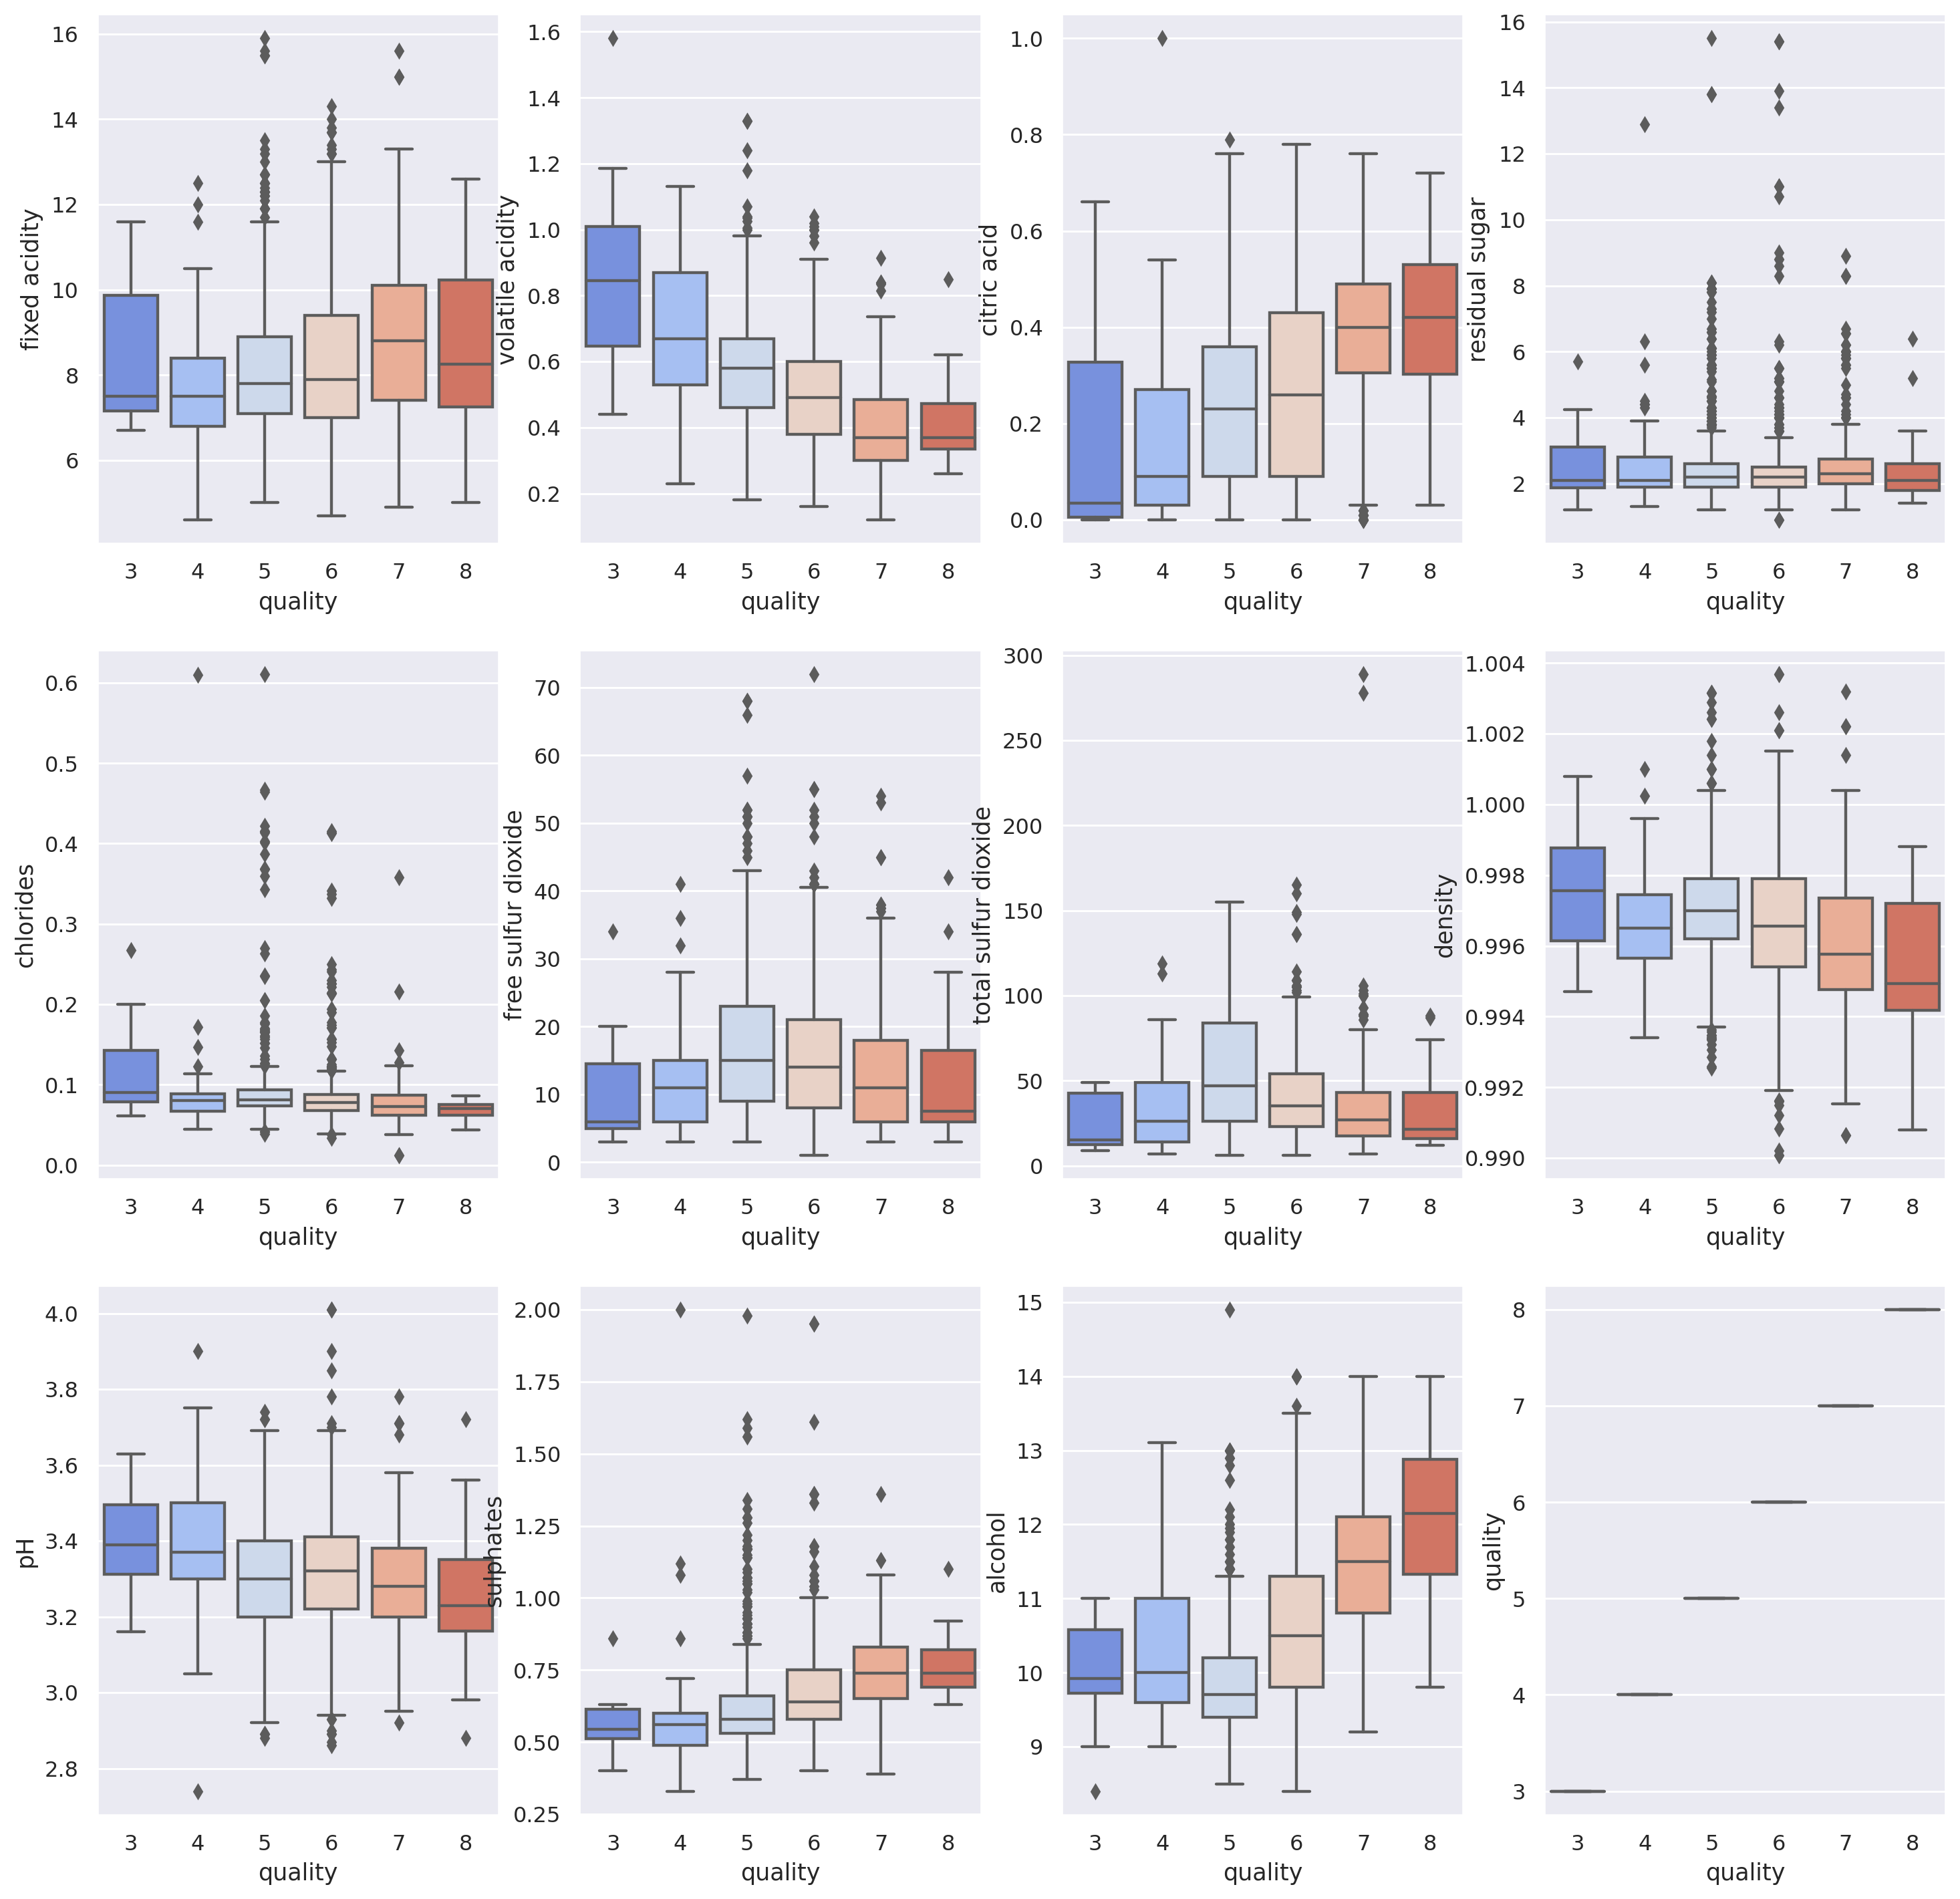

In [ ]:
fig, ax1 = plt.subplots(3,4, figsize=(17,17))
k = 0
columns = list(red.columns)
for i in range(3):
    for j in range(4):
            sns.boxplot(red['quality'], red[columns[k]], ax = ax1[i][j], palette='coolwarm')
            k += 1
plt.show()

Adicionalmente, los `boxplots` muestran que la varianza entre los niveles de calidad no es homogenea. La falta de homocedasticidad para las variables continuas puede ser importante al momento de aplicar los algoritmos de clasificacion o agrupamiento. Es evidente que debemos **pre-procesar** las variables del `Dataframe` **`red`** ya sea normalizando o homogenizando la varianza. 

A continuacion, vamos a ver si lo mismo sucede para el `Dataframe` **`white`**

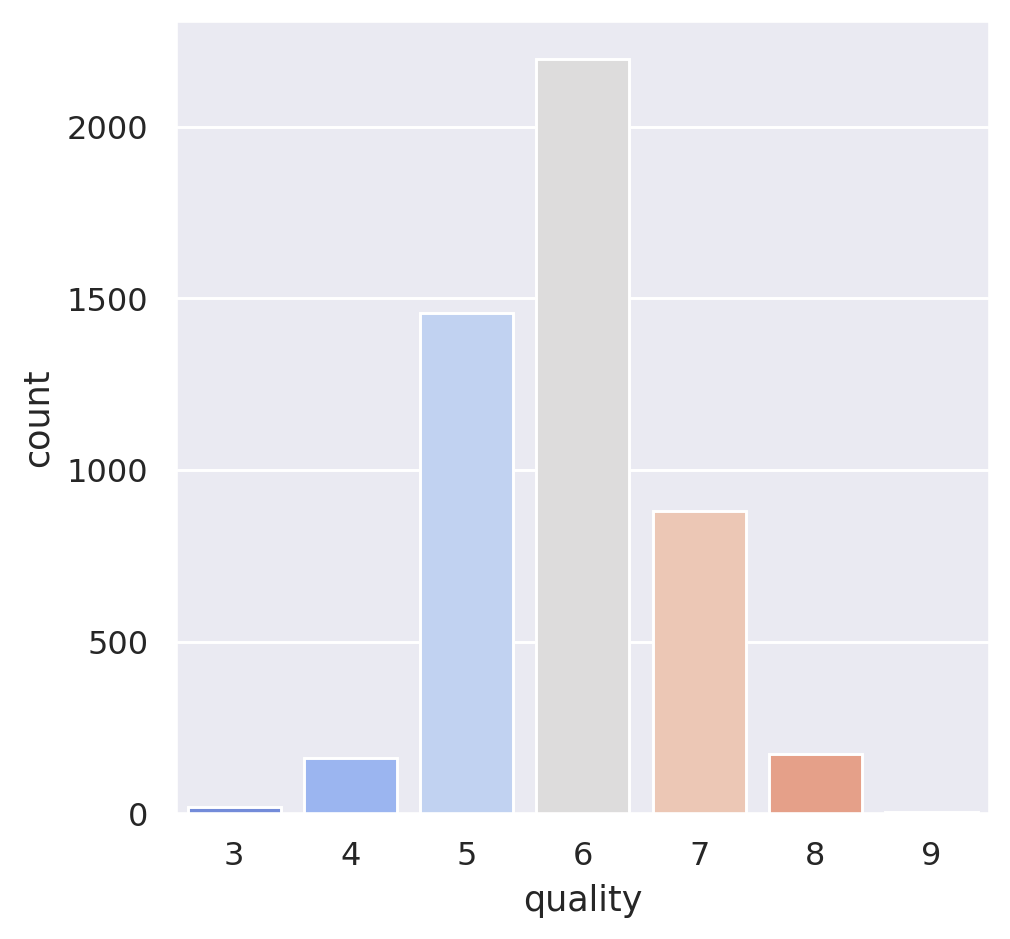

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot('quality', data=white, palette='coolwarm')

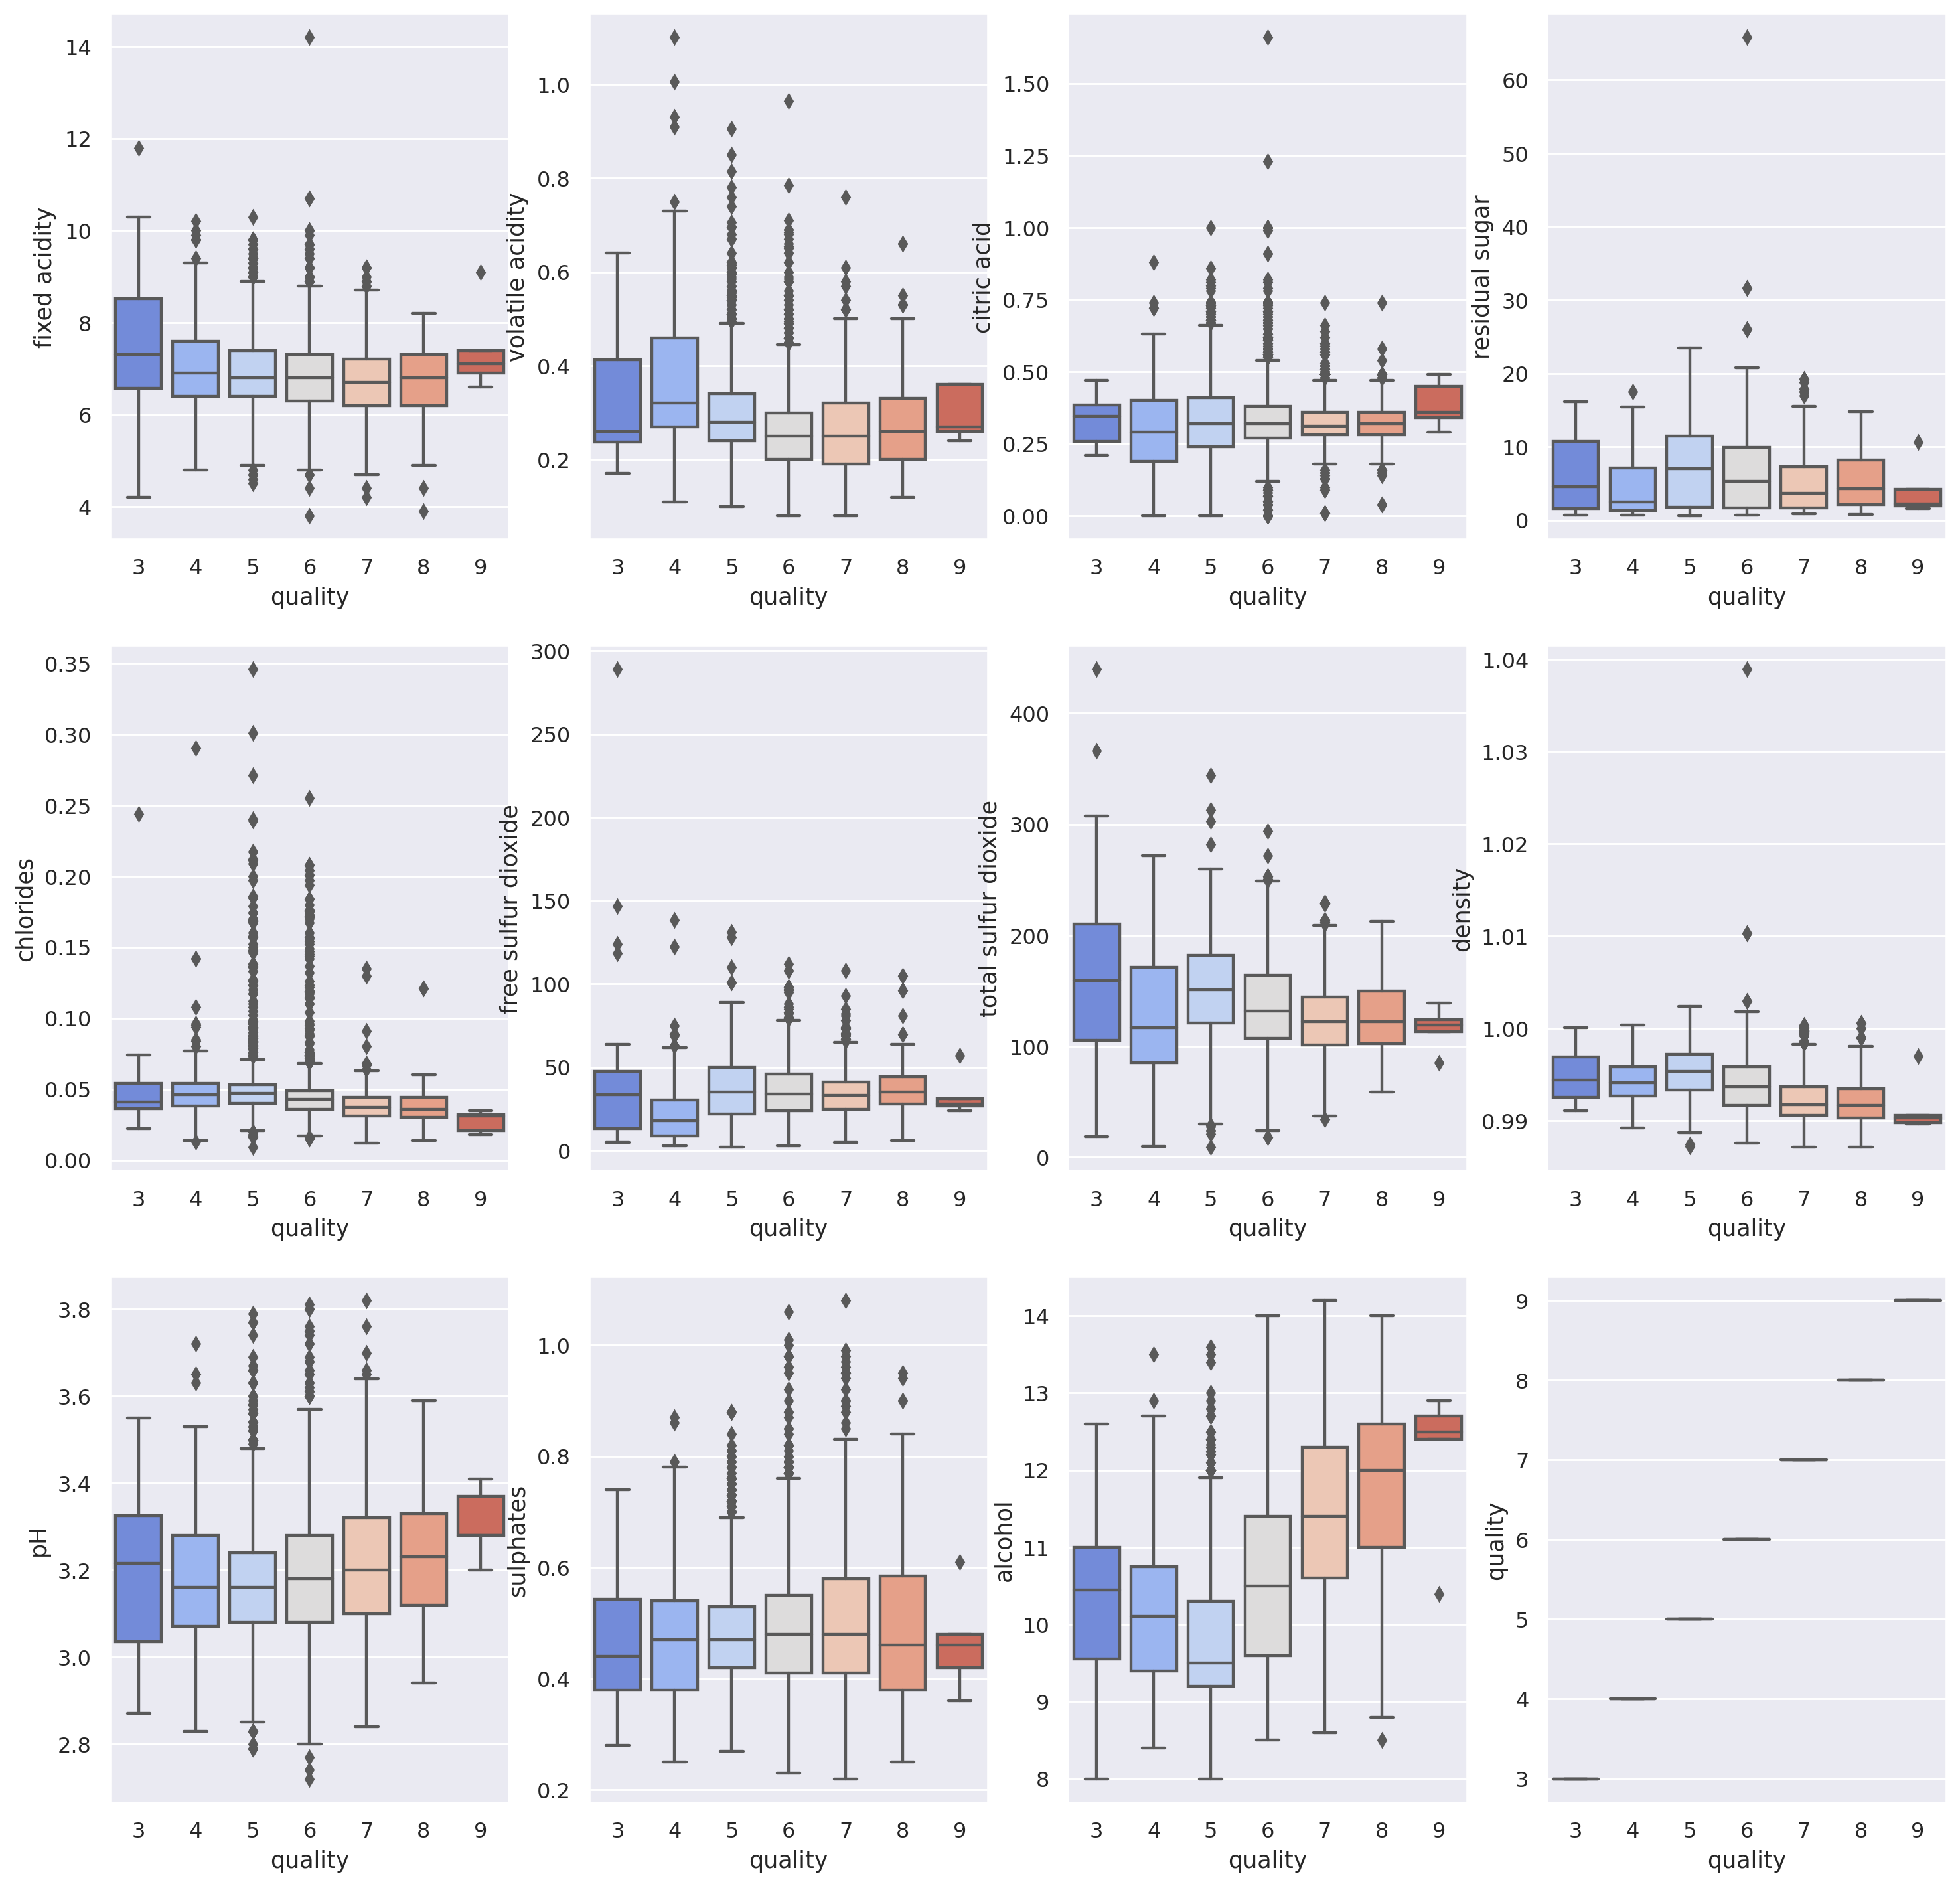

In [ ]:
fig, ax1 = plt.subplots(3,4, figsize=(17,17))
k = 0
columns = list(red.columns)
for i in range(3):
    for j in range(4):
            sns.boxplot(white['quality'], white[columns[k]], ax = ax1[i][j], palette='coolwarm')
            k += 1
plt.show()

En general, los datos del `Dataframe` **`white`** son homocedasticos, al ser separados por la variable categorica `quality`. Sin embargo siguen existiendo diferencias en el numero de ejemplos para cada nivel de `quality`, por lo que aplican las mismas restricciones vistas en el `Dataframe` **`red`**.

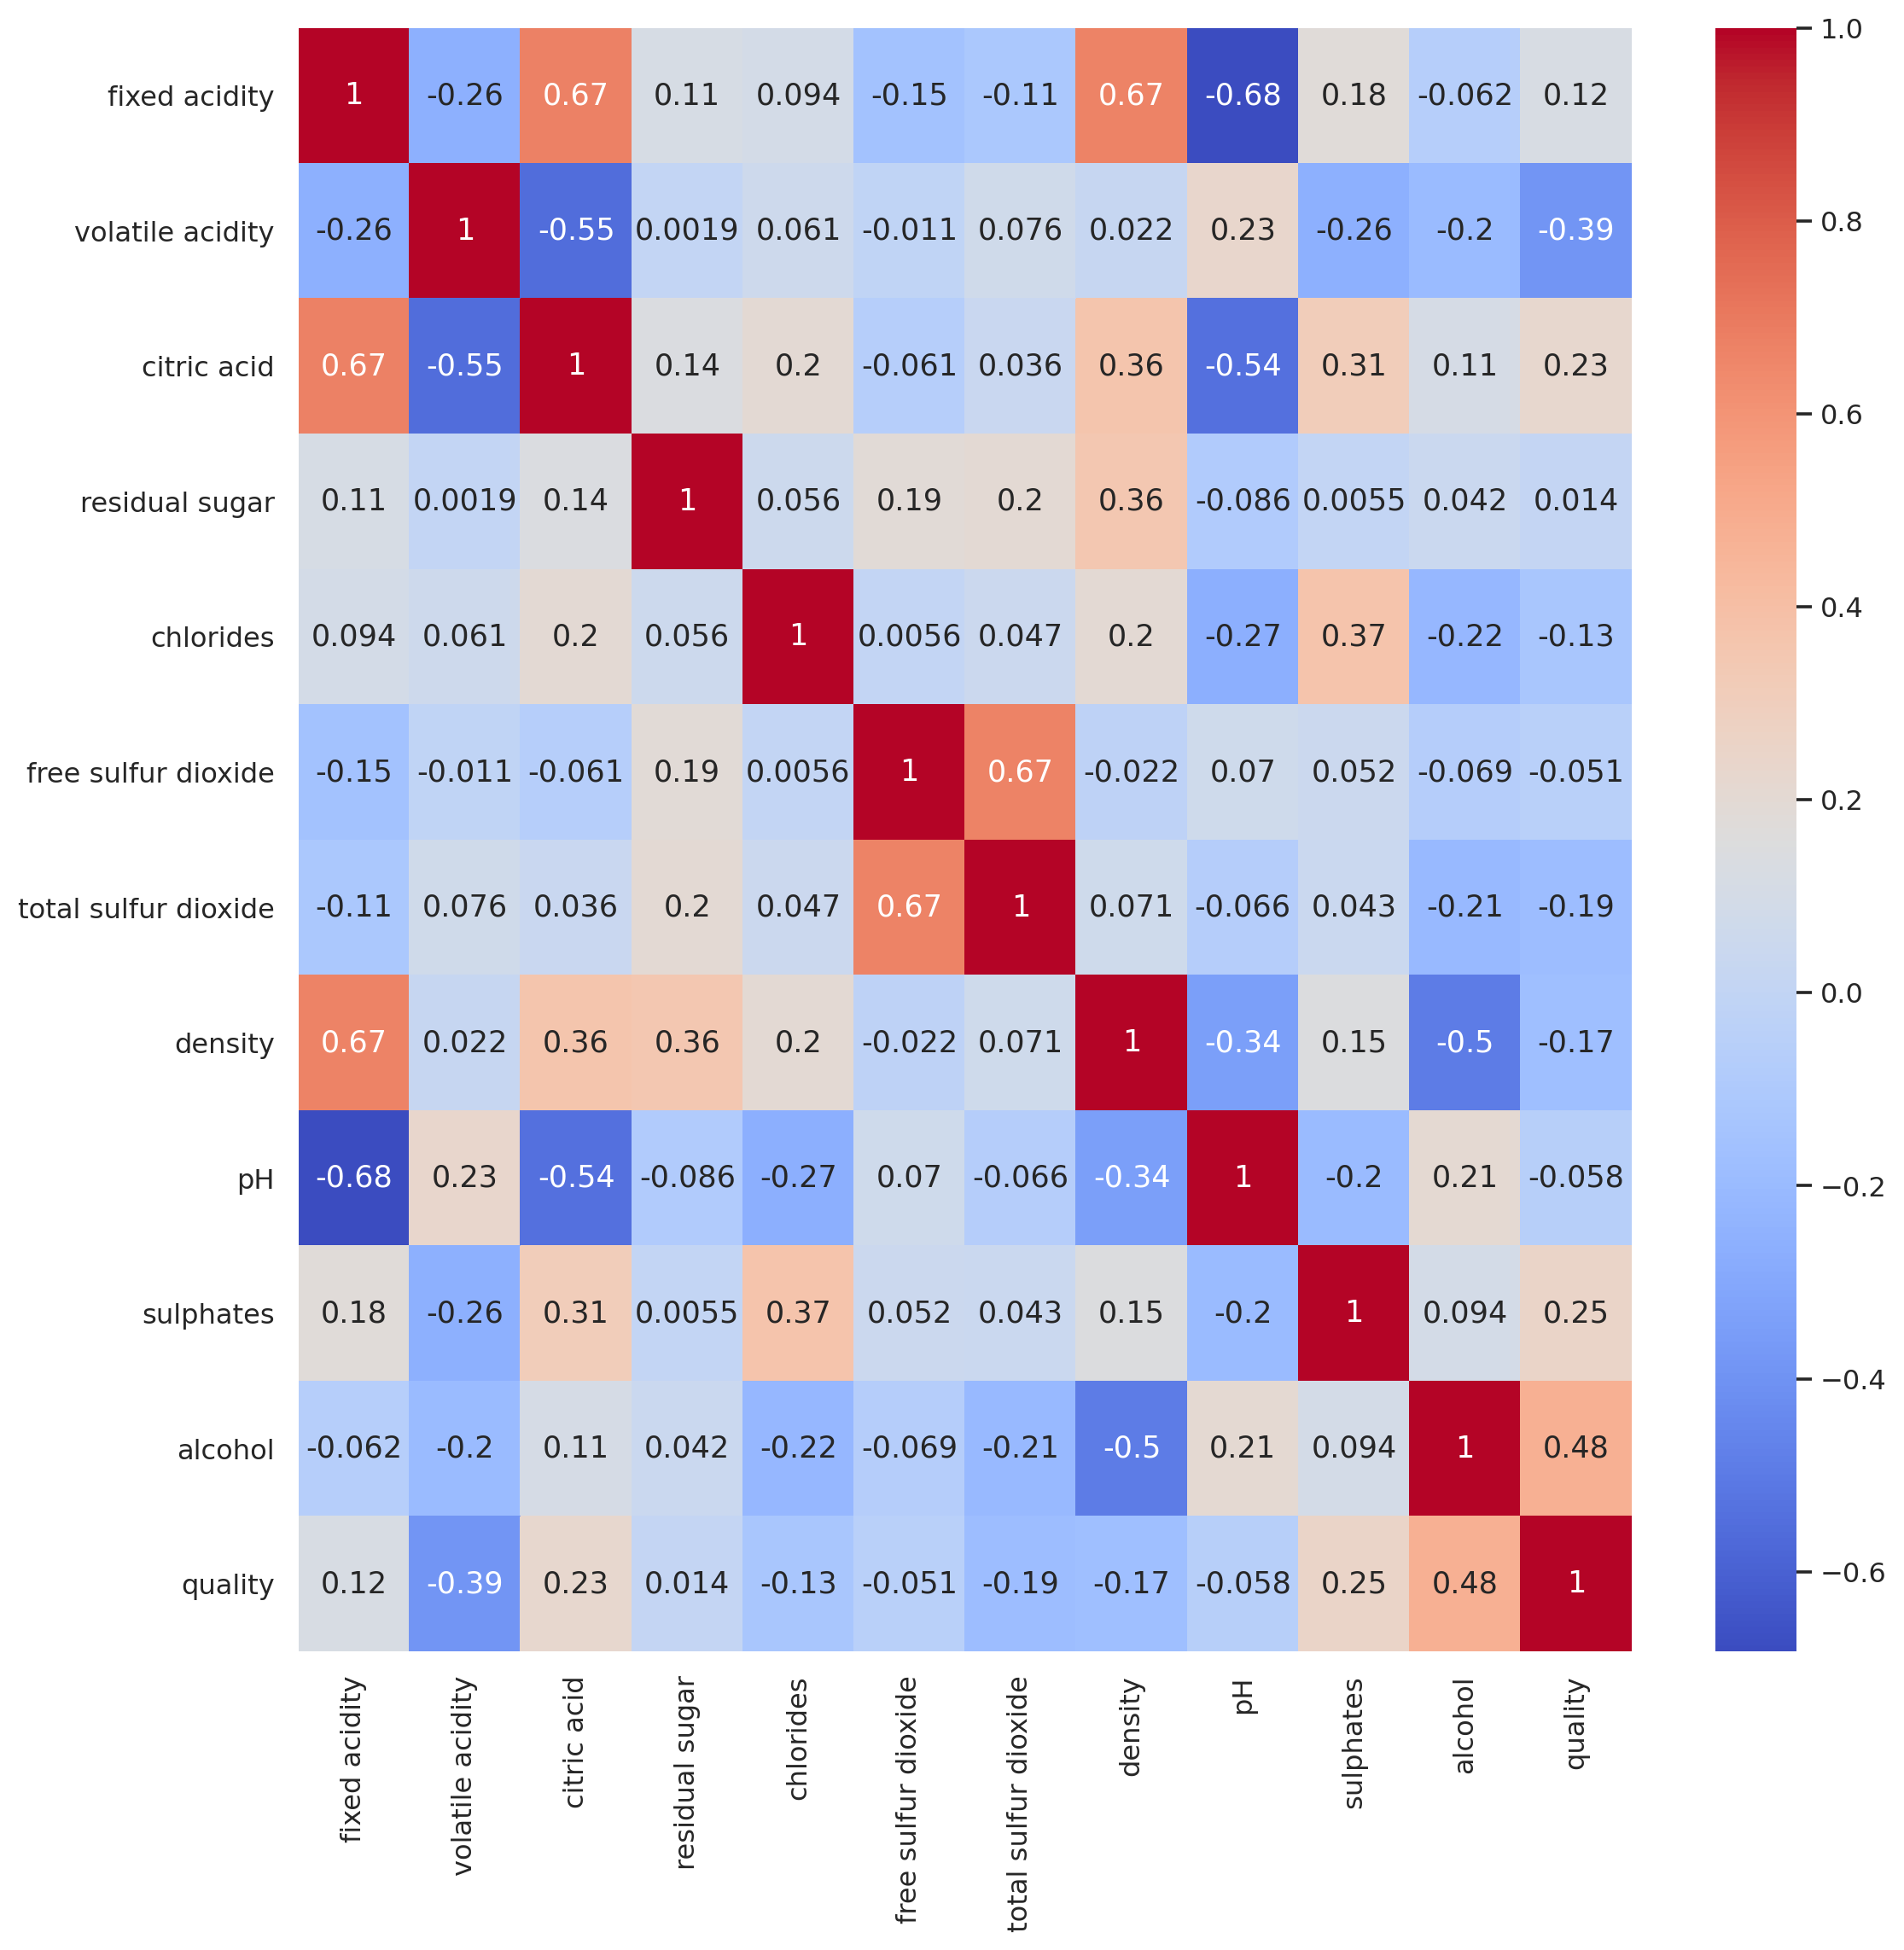

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(red.corr(), annot=True, cmap='coolwarm') 

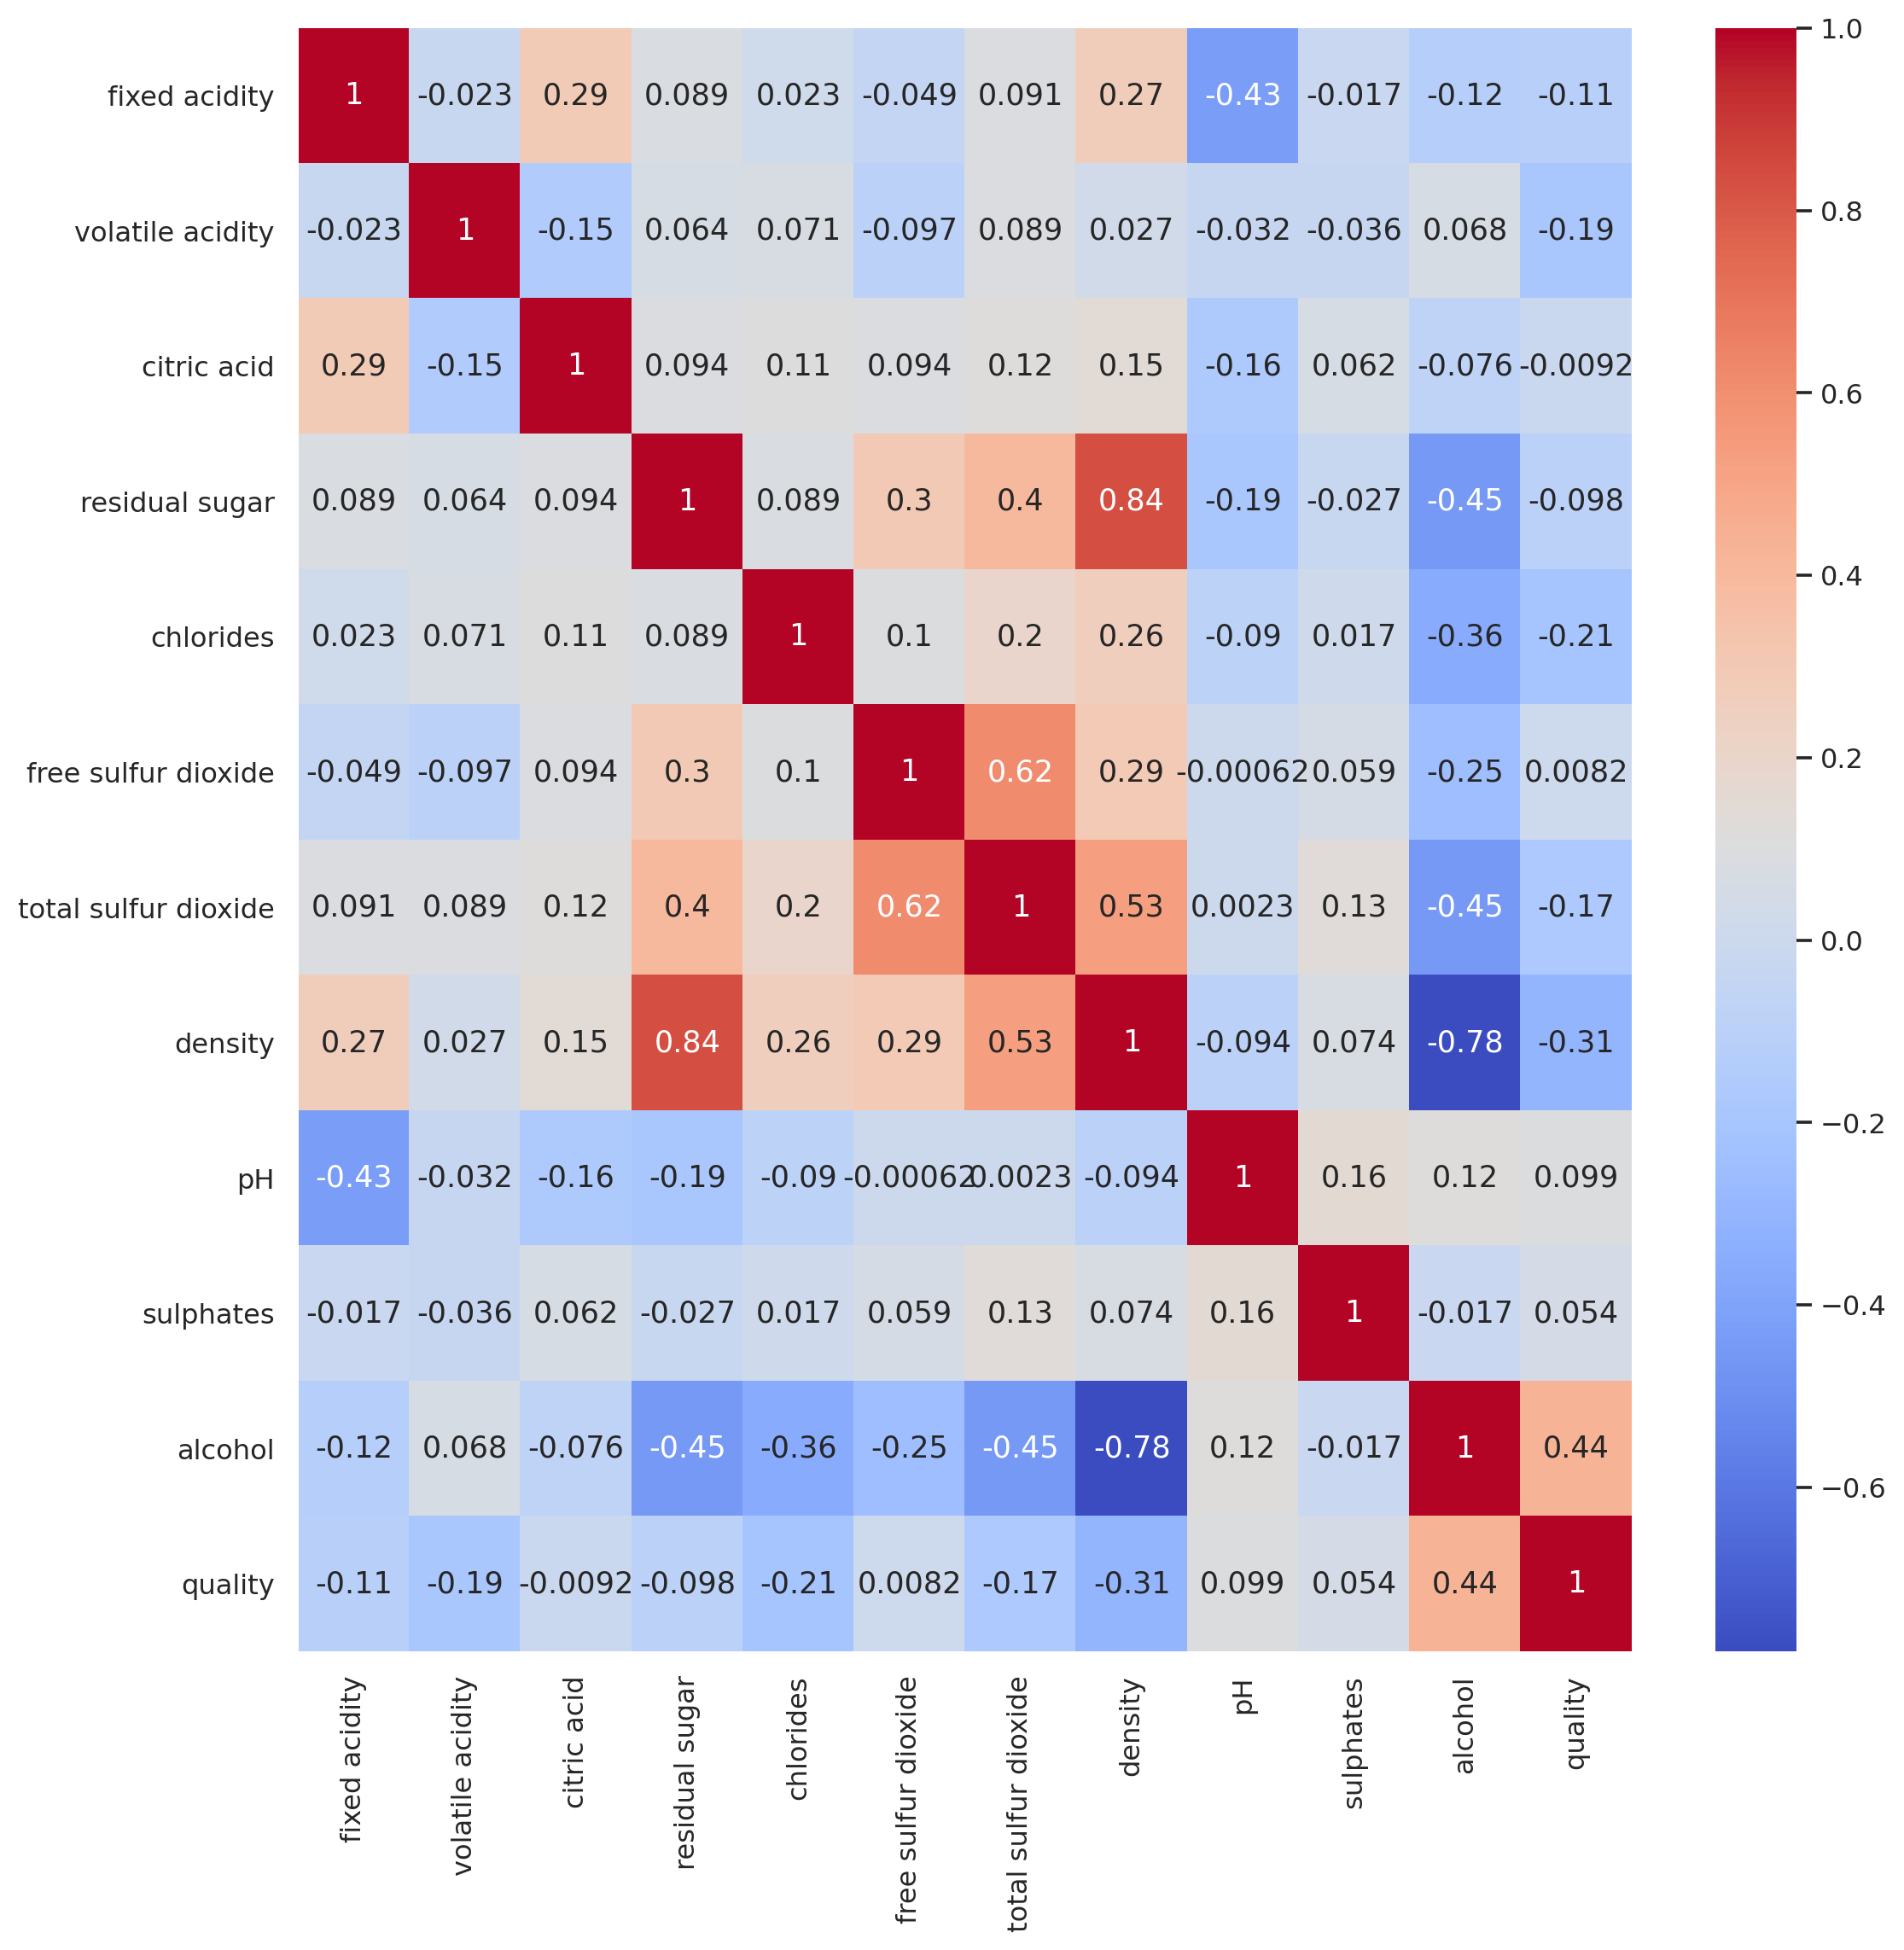

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(white.corr(), annot=True, cmap='coolwarm') 

## **3. Data Frame: Pre procesamiento**
-----

### **3.1 Data Frame: Concatenar tablas**


In [ ]:
print(red.shape, white.shape)

(1599, 12) (4898, 12)


In [ ]:
label1 = []

for i in range(1599):
  label1.append(0)

label2 = []

for i in range(4898):
  label2.append(1)

In [ ]:
red['label'] = label1
white['label'] = label2

In [ ]:
concat = pd.concat([red,white])
print(concat.shape)
print(concat.head(5))


(6497, 13)
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  label
0            7.4              0.70         0.00  ...      9.4        5      0
1            7.8              0.88         0.00  ...      9.8        5      0
2            7.8              0.76         0.04  ...      9.8        5      0
3           11.2              0.28         0.56  ...      9.8        6      0
4            7.4              0.70         0.00  ...      9.4        5      0

[5 rows x 13 columns]


Escalar el dataset completo

In [ ]:
from sklearn.preprocessing import StandardScaler
complete = concat.drop(columns = ['label','quality'])

sc = StandardScaler()
X_scaled = sc.fit_transform(complete.values)
pd.DataFrame(X_scaled).head(5)

0         1         2   ...        8         9         10
0  0.142473  2.188833 -2.192833  ...  1.813090  0.193097 -0.915464
1  0.451036  3.282235 -2.192833  ... -0.115073  0.999579 -0.580068
2  0.451036  2.553300 -1.917553  ...  0.258120  0.797958 -0.580068
3  3.073817 -0.362438  1.661085  ... -0.363868  0.327510 -0.580068
4  0.142473  2.188833 -2.192833  ...  1.813090  0.193097 -0.915464

[5 rows x 11 columns]

Separación X,y y escalamiento de las variables predictoras para vinos rojos y blancos por separado

In [ ]:
X_white = white.drop(columns = ['quality','label'])
X_red = red.drop(columns=['quality','label'])
y_white = white['quality']
y_red = red['quality']

print('Las dimensiones para el conjunto X de vinos blancos son {} \nLas dimensiones para el conjunto X de vinos rojos son {}'.format(X_white.shape, X_red.shape))
print('\nLas dimensiones para y de vinos blancos son {} \nLas dimensiones para y de vinos rojos son {}'.format(y_white.shape, y_red.shape))

X_white_scaled = sc.fit_transform(X_white)
X_red_scaled = sc.fit_transform(X_red)

Las dimensiones para el conjunto X de vinos blancos son (4898, 11) 
Las dimensiones para el conjunto X de vinos rojos son (1599, 11)

Las dimensiones para y de vinos blancos son (4898,) 
Las dimensiones para y de vinos rojos son (1599,)


In [ ]:
from sklearn.model_selection import train_test_split

Xw_train, Xw_test, yw_train, yw_test = train_test_split(X_white_scaled, y_white, 
                                                    test_size= 0.3,     # Proporción de datos usados para el grupo de evaluación.
                                                    random_state= 333, # Semilla aleatoria para la replicabilidad.
                                                    stratify=y_white)   # Estratificar con respecto a la etiqueta.

print(Xw_train.shape, Xw_test.shape, yw_train.shape, yw_test.shape)

(3428, 11) (1470, 11) (3428,) (1470,)


In [ ]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_red_scaled, y_red, 
                                                    test_size= 0.3,     # Proporción de datos usados para el grupo de evaluación.
                                                    random_state= 333, # Semilla aleatoria para la replicabilidad.
                                                    stratify=y_red)   # Estratificar con respecto a la etiqueta.

print(Xw_train.shape, Xw_test.shape, yw_train.shape, yw_test.shape)

(3428, 11) (1470, 11) (3428,) (1470,)


# **4. Modelamiento con aprendizaje no supervisado**

## **4.1  Análisis de componentes principales**


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Se saca del dataset completo la columna label que identifica si el vino es rojo o blanco, y también se quita la variable a predecir quality.

In [ ]:
complete = concat.drop(columns = ['label','quality'])
complete.head(5)

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0            7.4              0.70         0.00  ...  3.51       0.56      9.4
1            7.8              0.88         0.00  ...  3.20       0.68      9.8
2            7.8              0.76         0.04  ...  3.26       0.65      9.8
3           11.2              0.28         0.56  ...  3.16       0.58      9.8
4            7.4              0.70         0.00  ...  3.51       0.56      9.4

[5 rows x 11 columns]

Para realizar el PCA se requiere autoescalar los datos correspondientes a las variable predictoras, este procedimiento se realizó usando StandardScaler de scikitlearn.

In [ ]:
pca = PCA(n_components = 11) 
transf = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
components = range(1,12)

In [ ]:
pd.DataFrame(transf) 

0         1         2   ...        8         9         10
0    -3.205996  0.416523 -2.722237  ...  0.071229 -0.108046  0.027460
1    -3.039051  1.107462 -2.046952  ... -0.429129 -0.268149 -0.015471
2    -3.071893  0.878964 -1.742580  ... -0.271032 -0.086832  0.054146
3    -1.571262  2.112545  2.592917  ...  0.549410  0.116660 -0.103745
4    -3.205996  0.416523 -2.722237  ...  0.071229 -0.108046  0.027460
...        ...       ...       ...  ...       ...       ...       ...
6492 -0.062824 -1.934205  0.223912  ...  0.070114 -0.102160 -0.012106
6493  1.866989  0.524431 -0.431798  ... -0.122212 -0.479837 -0.080560
6494  0.571133 -0.722662  0.091469  ... -0.133957 -0.356173  0.158103
6495  0.090052 -3.545780  0.141195  ... -0.255940  0.266327  0.054196
6496  0.512576 -2.891040  0.739417  ... -0.181712 -0.120059  0.008531

[6497 rows x 11 columns]

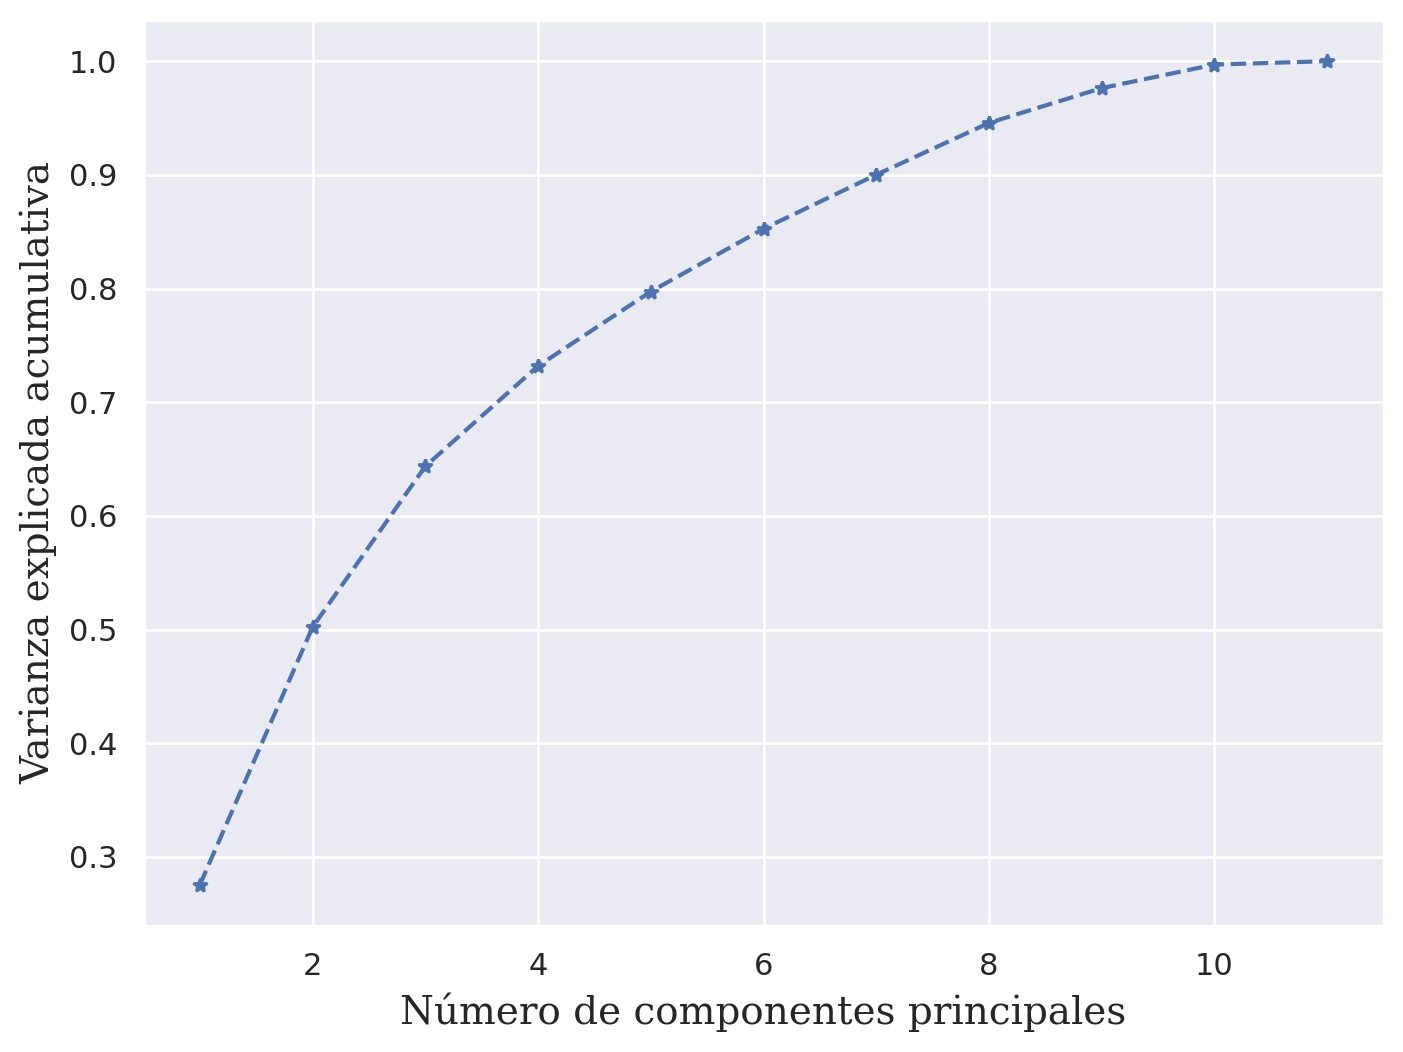

In [ ]:
#@title Curva acumulativa de la varianza explicada en función del número de componentes principales


plt.figure(dpi = 100, figsize = (8, 6))

plt.xlabel('Número de componentes principales',
             fontdict= dict(family ='serif', size = 14))
plt.ylabel('Varianza explicada acumulativa',
             fontdict= dict(family ='serif', size = 14))

plt.plot(components, cum_explained_variance,'--b') 
plt.plot(components, cum_explained_variance,'b*', ms = 5) 

  
plt.show()

In [ ]:
# Función para visualizar un conjunto de datos en 2D

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        plt.scatter(this_X[:, 0], this_X[:, 1],  color=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    plt.legend(labels = ['red wine','white wine'])

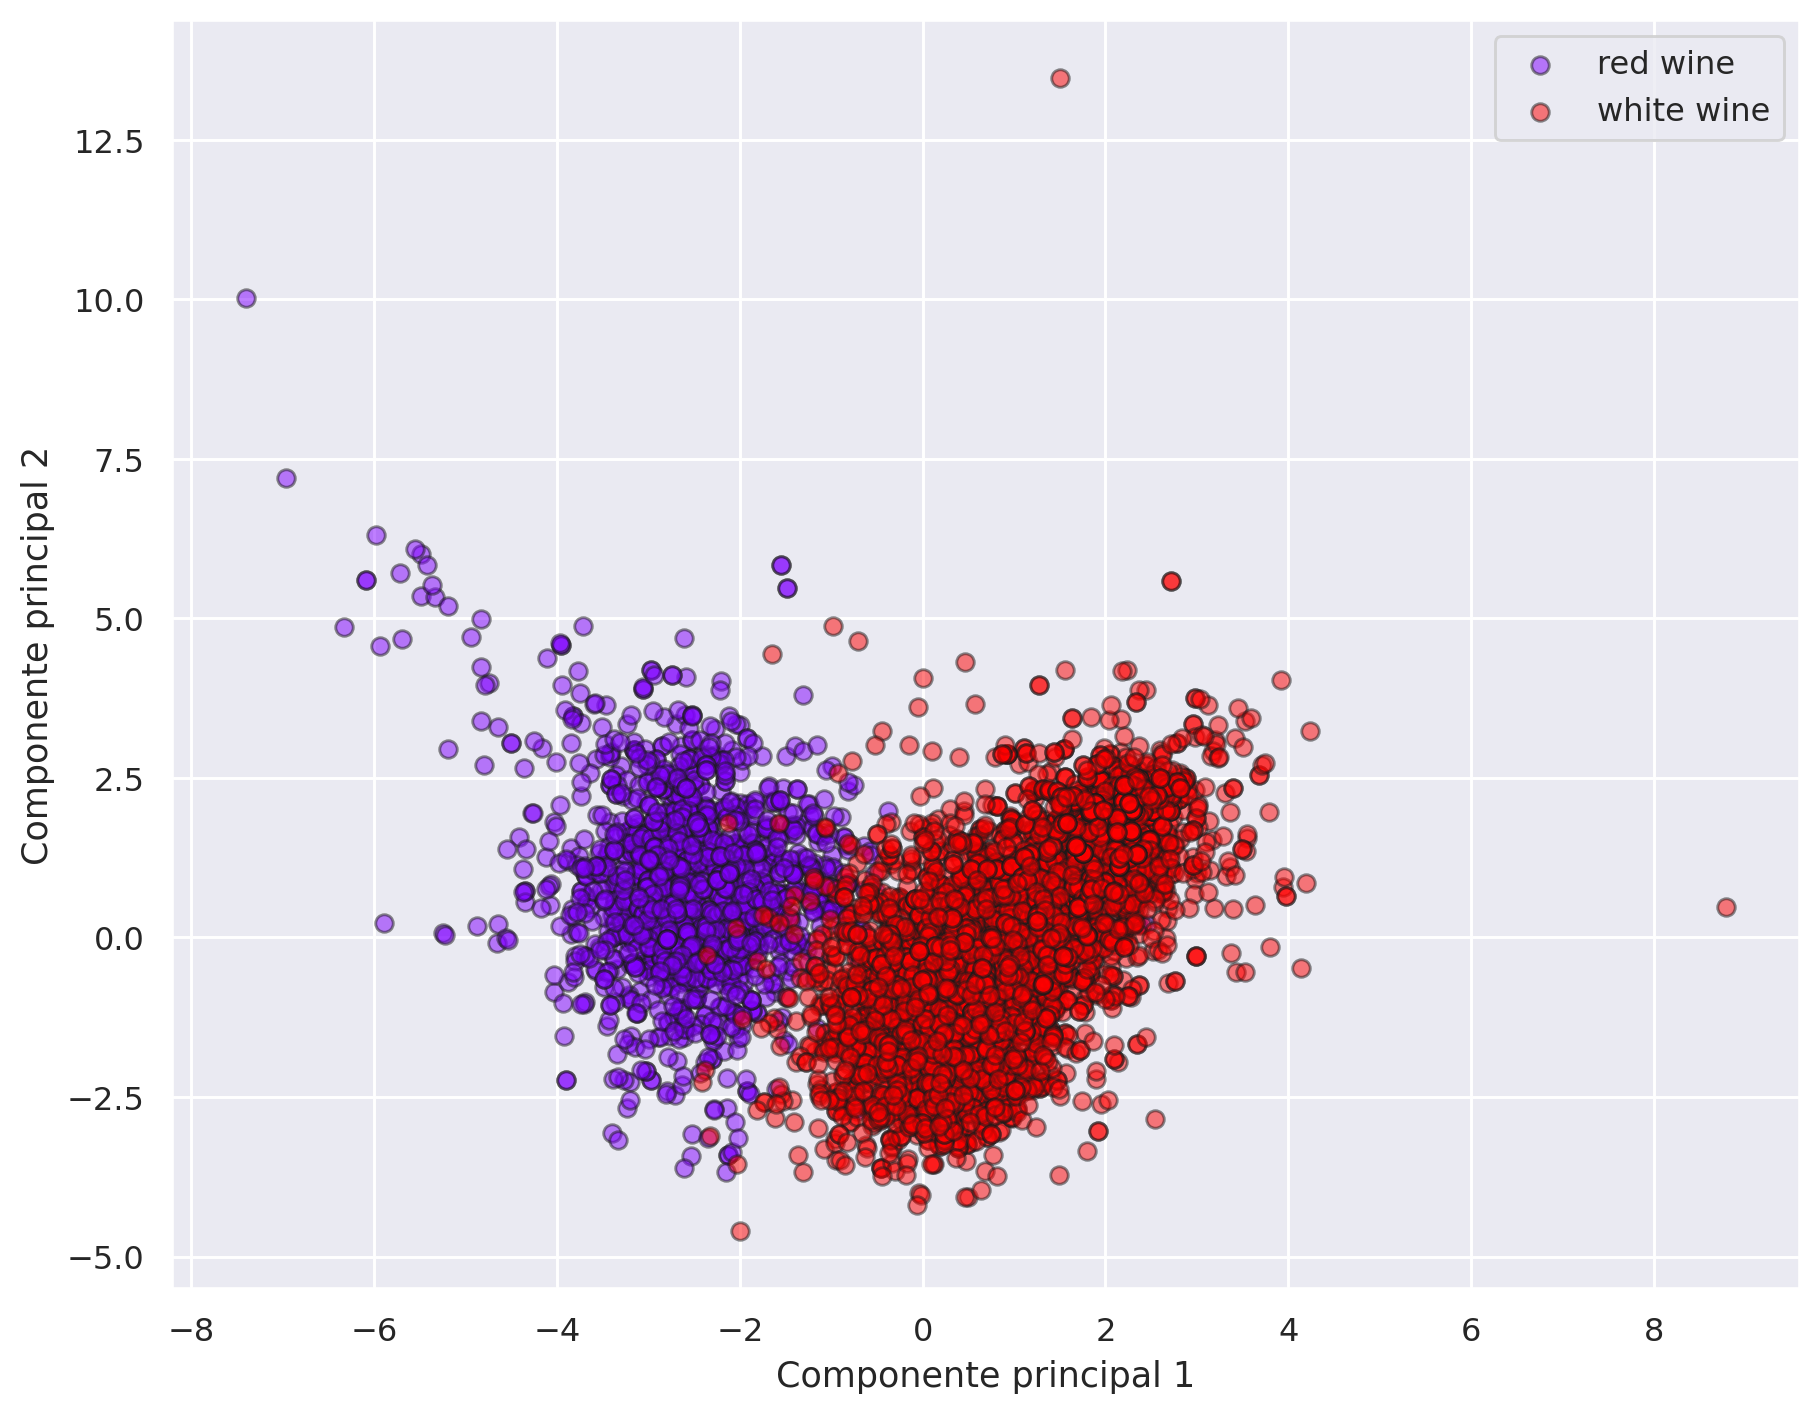

In [ ]:
#@title Vectores singulares más significativos después de la transformación lineal a través de PCA
plt.figure(figsize = (10, 8), dpi = 105)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')

plot_data(transf[:,0:2], concat['label'])

Haciendo la visualización de los datos transformados en el espacio del componente principal 1 y 2 se pueden observar dos aglomeraciones que se distinguen a simple vista. Hay una zona intermedia de sobrelapamiento de ambos grupos, sin embargo es posible identificar en la mayoría de los casos se puede distinguir los dos tipos de vinos empleando únicamente 2 PCs.

In [ ]:
pd.DataFrame(pca.components_) #Las columnas son las 11 variables y las filas son los 11 componentes principales

0         1         2   ...        8         9         10
0  -0.238799 -0.380757  0.152388  ... -0.218686 -0.294135 -0.106437
1   0.336355  0.117550  0.183299  ... -0.155869  0.191716 -0.465058
2   0.434301 -0.307259  0.590570  ... -0.455324  0.070042  0.261101
3  -0.164346 -0.212785  0.264300  ...  0.414551  0.640536  0.106803
4   0.147480 -0.151456  0.155349  ...  0.453376  0.136577  0.188892
5   0.204554  0.492143 -0.227634  ... -0.296579  0.296926  0.518378
6  -0.283079 -0.389160 -0.381285  ... -0.418907  0.525343 -0.104103
7  -0.401236  0.087435  0.293412  ...  0.028643 -0.165818  0.399234
8   0.344057 -0.496933 -0.402689  ...  0.127837 -0.207764  0.251890
9   0.281268 -0.152177 -0.234463  ...  0.141311 -0.045959  0.205053
10 -0.334679 -0.084772  0.001109  ... -0.206361 -0.077202  0.335702

[11 rows x 11 columns]

## **4.2 K-Means**

La intuición detrás de estandarizar las variables numéricas para KMeans proviene de que KMeans por defecto utiliza una métrica de distancia euclidiana, la cual es sensible a las unidades de las características. Es decir, una característica con alta varianza podría influir más en los resultados del agrupamiento. Con la estandarización nos aseguramos de que cada característica influye a la distancia de una manera similar.

Cómo regla general, debería probar el desempeño de un agrupamiento sin preprocesamiento y compararlo con el desempeño de un agrupamiento con preprocesamiento.

### **4.2.0. Funciones de utilidad y visualización**

In [ ]:
# Gracicar la curva de aprendizaje de determinada métrica de agrupamiento.

def plot_metric(K, scores, metric_name):
  plt.figure(dpi=110, figsize=(5, 5))
  plt.plot(K, scores, 'bx-')
  plt.xticks(K); plt.xlabel('$k$', fontdict=dict(family = 'serif', size = 14));  plt.ylabel(metric_name, fontdict=dict(family = 'serif', size = 14));
  plt.title(f'K vs {metric_name}', fontdict=dict(family = 'serif', size = 18))
  plt.show()

In [ ]:
# Gráfica individual del resultado de un agrupamiento.
from sklearn.metrics import silhouette_score 

def plot_cluster_predictions(clustering, X, n_clusters = None, cmap = 'tab10',
                             plot_data=True, plot_centers=True, show_metric=None,
                             title_str="", ax = None):

    assert not hasattr(clustering, "n_clusters") or \
           (hasattr(clustering, "n_clusters") and n_clusters is not None), "must specify `n_clusters` for "+str(clustering)

    if n_clusters is not None:
        clustering.n_clusters = n_clusters

    y = clustering.fit_predict(X)
    # remove elements tagged as noise (cluster nb<0)
    X = X[y>=0]
    y = y[y>=0]

    if n_clusters is None:
        n_clusters = len(np.unique(y))
        
    if ax is None:
        ax = plt.gca()

    if plot_data:        
        sns.scatterplot(X[:,0], X[:,1], hue = y, palette=cmap, 
                        legend = False, alpha=.5 ,ax = ax, s = 40)

    if plot_centers and hasattr(clustering, "cluster_centers_"):
        sns.scatterplot(clustering.cluster_centers_[:,0],                         
                    clustering.cluster_centers_[:,1], hue = np.unique(y), s=180,  lw=3,
                    palette=cmap,
                    edgecolor="black", legend = False, ax = ax)   

    if show_metric is not None:
        if show_metric == 'inercia' and hasattr(clustering, 'inertia_'):
          inertia = clustering.inertia_
          ax.set_title("Inercia = {:.0f}".format(inertia)+ title_str, fontdict=dict(family = 'serif', size = 20))
        elif show_metric == 'silueta':          
          sc = silhouette_score(X, y) if len(np.unique(y)) > 1 else 0
          ax.set_title("Coeficiente de silueta = {:.3f}".format(sc)+ title_str, fontdict=dict(family = 'serif', size = 20))
    else:
        ax.set_title("k={}".format(n_clusters) +title_str, fontdict=dict(family = 'serif', size = 20))

    plt.axis("off")
    
    return

### **4.2.1. Preprocesamiento con `StandardScaler`**
---


Recordemos que los *DataFrame* **`red`** y **`white`** ya fueron escalados en el preprocesamiento (Ver 3.1), con la transformación **`StandardScaler`** 


In [ ]:
pd.DataFrame(Xr_train).head(3)

0         1         2   ...        8         9         10
0 -0.068735  0.626688 -0.005010  ... -1.173483 -0.225128 -1.241848
1 -0.700719 -0.378878 -0.364463  ...  0.381544 -0.107102 -0.021574
2 -0.470907  0.235635 -1.288771  ...  0.316751 -0.225128  0.353895

[3 rows x 11 columns]

In [ ]:
# Métodos de agrupamiento - Algoritmo K-means
from sklearn.cluster import KMeans

# Número de clusters que se desea generar.
n = 7  
km = KMeans(n_clusters = n)
km.fit(Xr_train)

y = km.predict(Xr_test)

In [ ]:
from sklearn.model_selection import train_test_split

Xred_train, Xred_test, yred_train, yred_test = train_test_split(X_red, y_red, 
                                                    test_size= 0.3,     # Proporción de datos usados para el grupo de evaluación.
                                                    random_state= 333, # Semilla aleatoria para la replicabilidad.
                                                    stratify=y_red)   # Estratificar con respecto a la etiqueta.

print(Xw_train.shape, Xw_test.shape, yw_train.shape, yw_test.shape)

(3428, 11) (1470, 11) (3428,) (1470,)


In [ ]:
# Métodos de agrupamiento - Algoritmo K-means
from sklearn.cluster import KMeans

# Número de clusters que se desea generar.
n = 7  
km = KMeans(n_clusters = n)
km.fit(Xred_train)

y = km.predict(Xred_test)

### **4.2.2. Evaluación del desempeño interna (no supervisada)**
---
Con la siguiente celda podemos ver la curva de inercia y coeficiente de silueta:

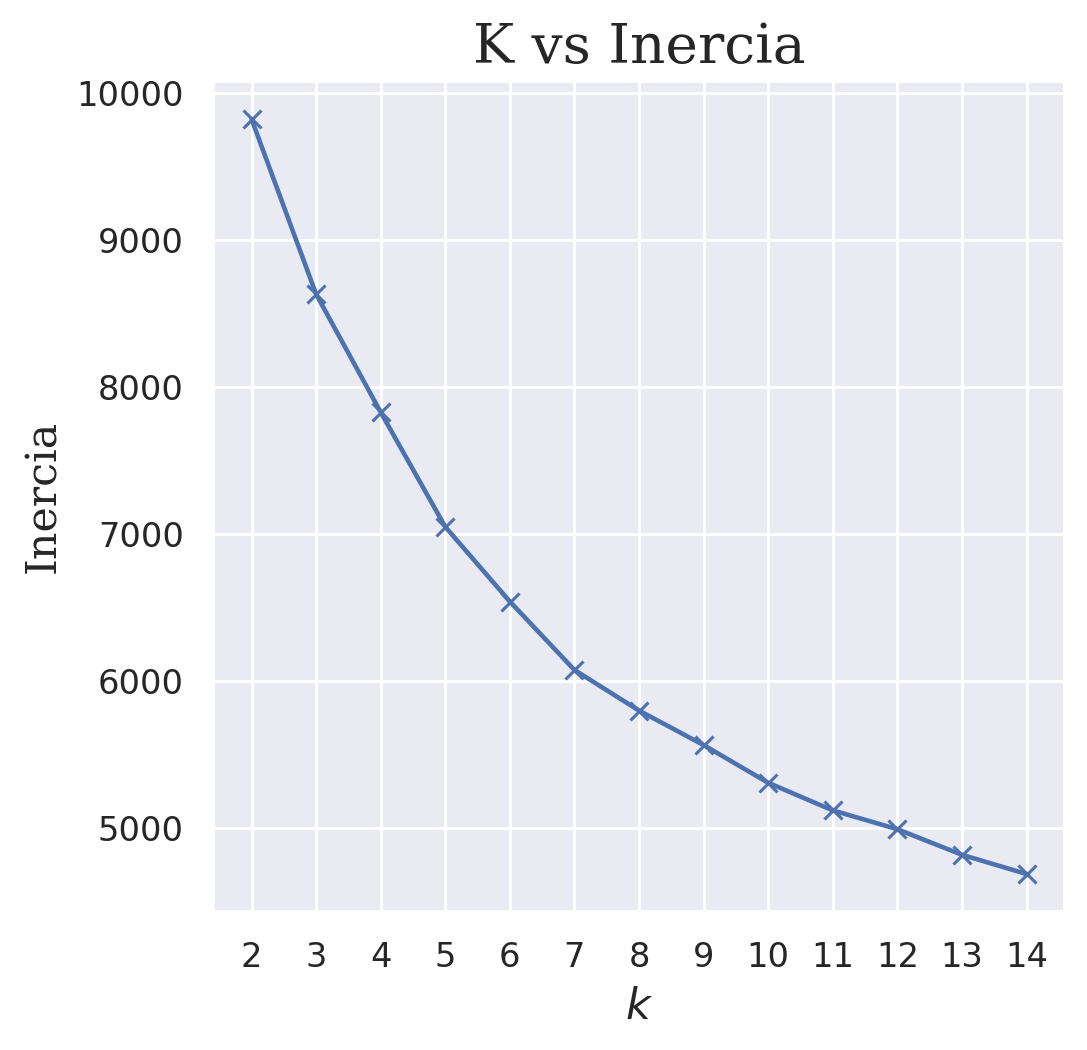

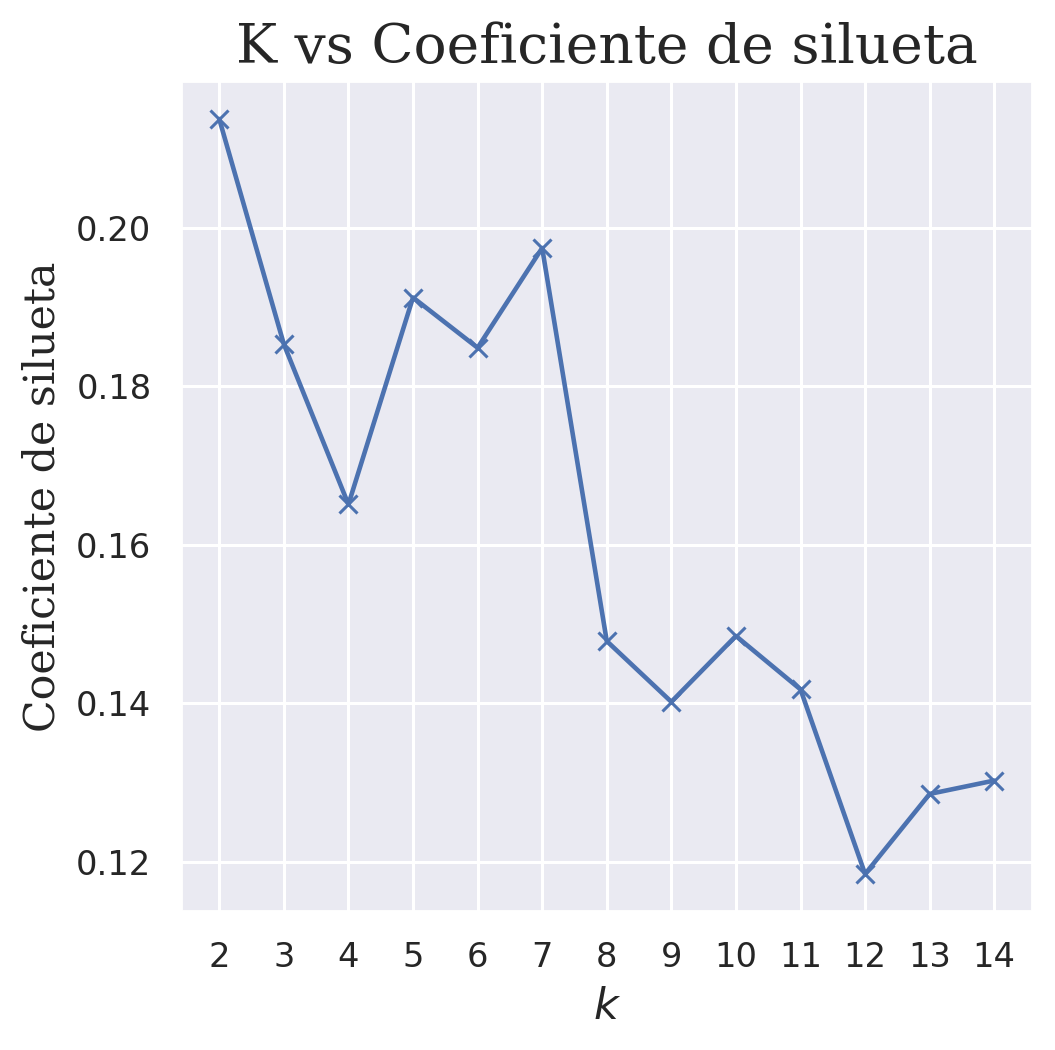

In [ ]:
inertia = []
silhouette = []
K = range(2, 15)
for i in K:
  # Declaramos y ejecutamos el algoritmo K-means.
  model = KMeans(n_clusters=i)
  model.fit(Xr_train)

  # Predecimos las etiquetas de X_preprocessed.
  y = model.predict(Xr_test)

  # Almacenamos la métrica de inercia y el coeficiente de silueta.
  inertia.append(model.inertia_)
  silhouette.append(silhouette_score(Xr_test, y))
  

plot_metric(K, inertia, 'Inercia')
plot_metric(K, silhouette, 'Coeficiente de silueta')

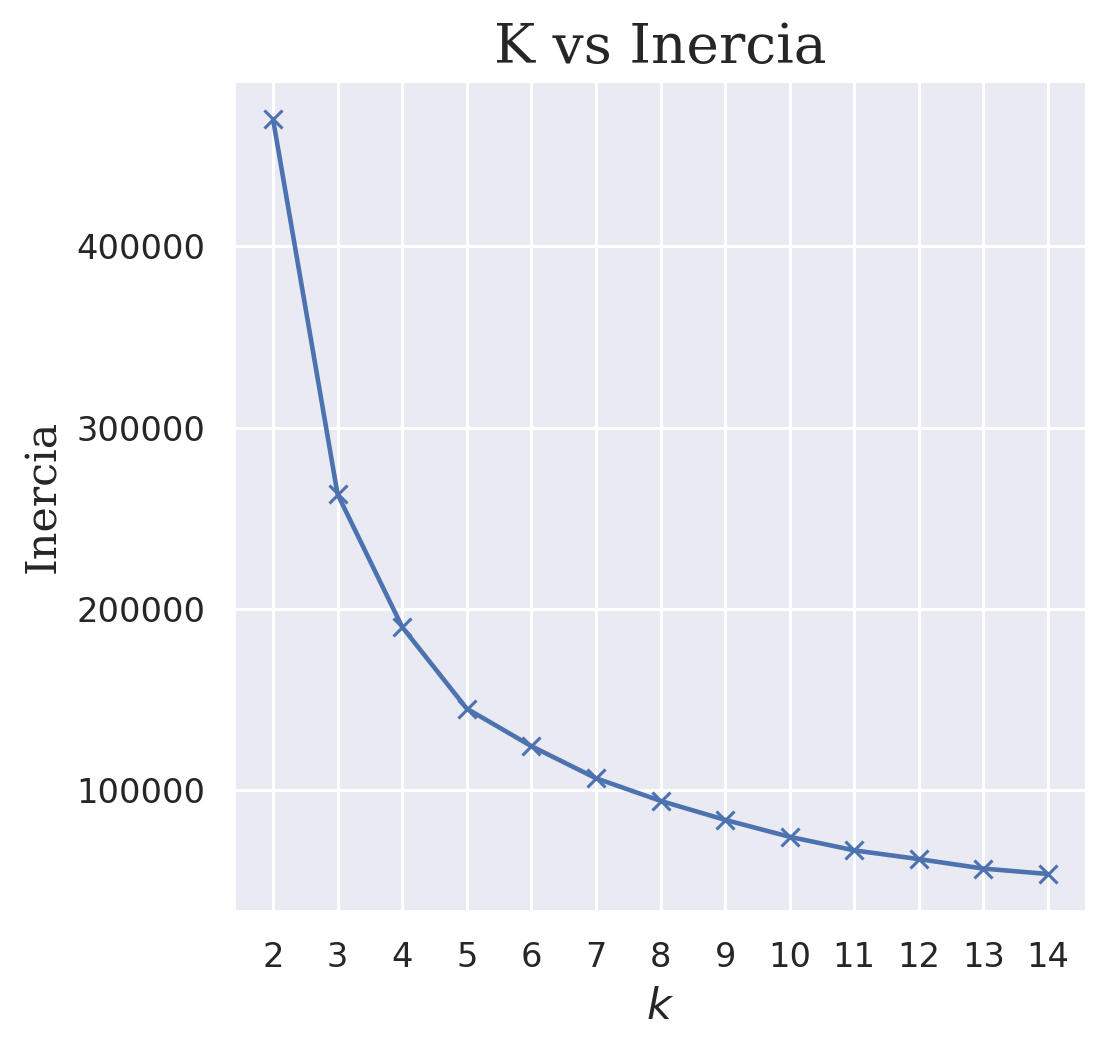

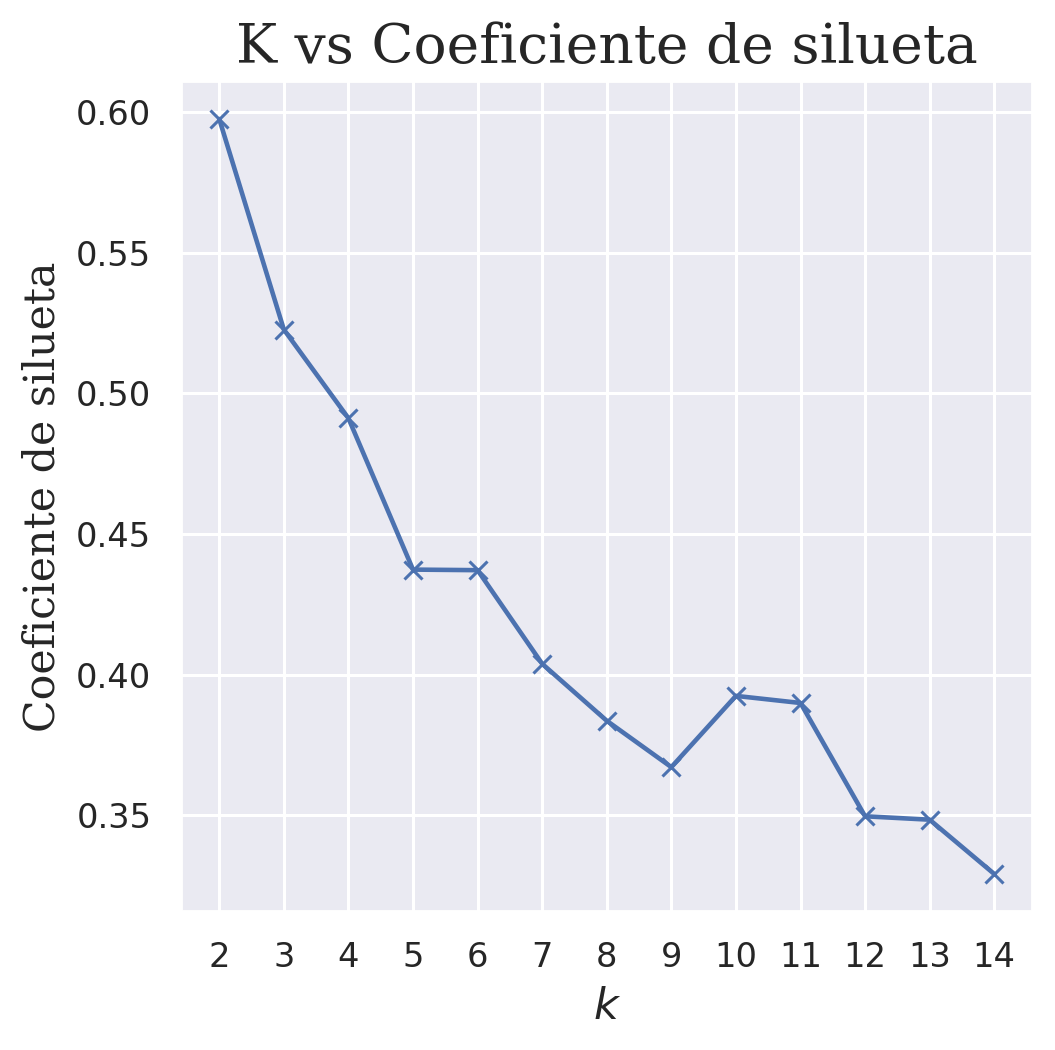

In [ ]:
inertia = []
silhouette = []
K = range(2, 15)
for i in K:
  # Declaramos y ejecutamos el algoritmo K-means.
  model = KMeans(n_clusters=i)
  model.fit(Xred_train)

  # Predecimos las etiquetas de X_preprocessed.
  y = model.predict(Xred_test)

  # Almacenamos la métrica de inercia y el coeficiente de silueta.
  inertia.append(model.inertia_)
  silhouette.append(silhouette_score(Xred_test, y))
  

plot_metric(K, inertia, 'Inercia')
plot_metric(K, silhouette, 'Coeficiente de silueta')

Hasta ahora podemos notar que hay diferencias entre usar un *DataFrame* escalado, usando **`StadardScaler`** que agrupando los datos libres de escalado. Por ejemplo, aunque la curva de inercia no se estabiliza para ninguno de los *DataFrame*, hay diferencias en las escalas, siendo la de los datos escalados la más cercana a cero.

Adicionalmente, la curva de coeficiente de silueta muestra un máximo cercano al esperado (*k = 7*), en contraposición de la curva de coeficiente de silueta para los datos sin escalar, donde no se logra obtener un buen coeficiente de silueta cuando $2<=k<=n$ con $k$ siendo el número de clusters y $n$ el tamaño de la muestra.

### **4.2.3. Evaluación del desempeño externa (supervisada)**
---
Graficamos la homogeneidad:

In [ ]:
def plot_extern_metric(X, y, metric, metric_name):
  scores = []
  for i in range(2,20):
    model = KMeans(n_clusters=i, random_state=32)
    model.fit(X)
    y_pred = model.predict(X)
    scores.append(metric(y, y_pred))

  plot_metric(range(2, 20), scores, metric_name) 

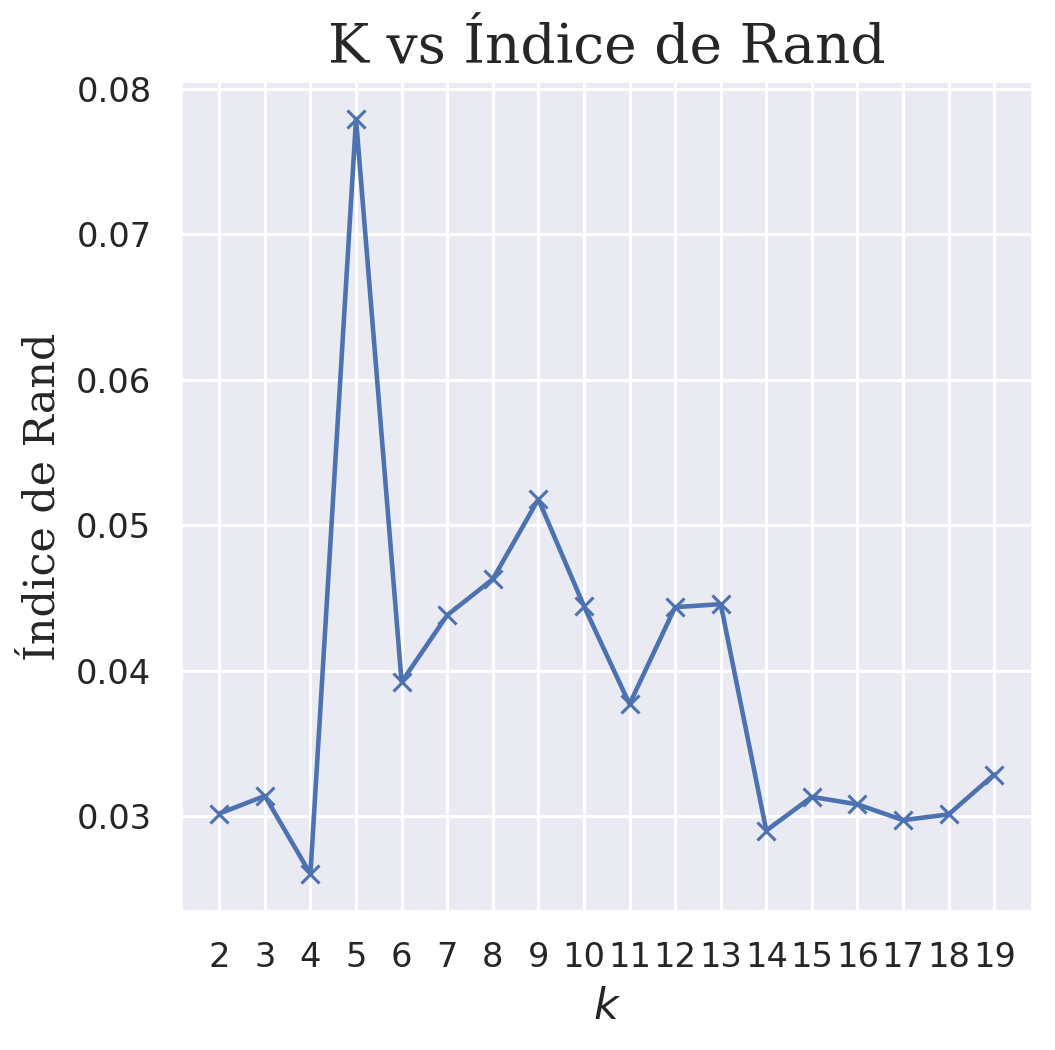

In [ ]:
from sklearn.metrics import adjusted_rand_score
plot_extern_metric(Xr_test, yr_test, adjusted_rand_score, 'Índice de Rand')

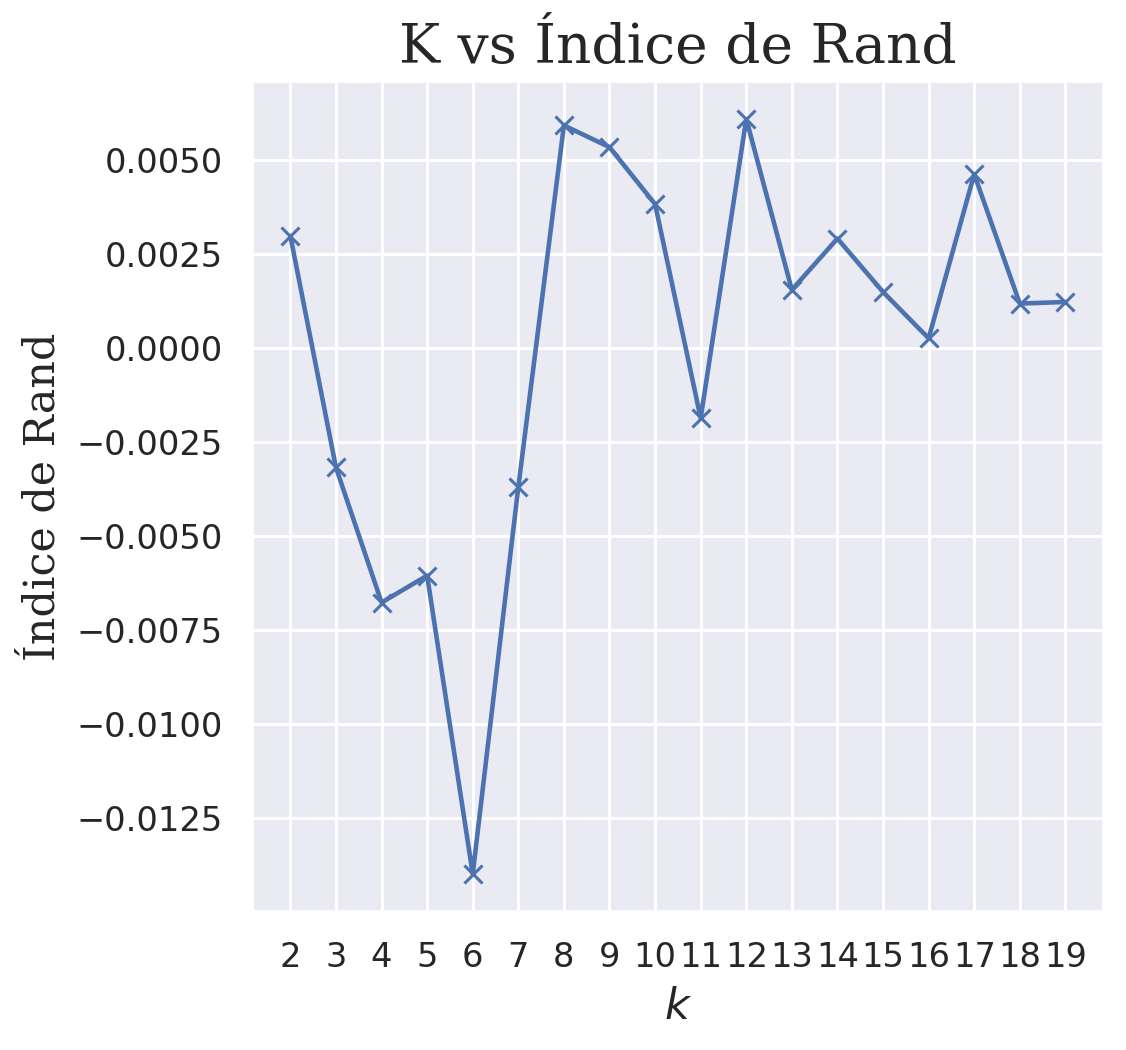

In [ ]:
plot_extern_metric(Xred_test, yred_test, adjusted_rand_score, 'Índice de Rand')

Sin embargo, al tratar de evaluar el agrupamiento usando los *DataFrame* de prueba, se evidencia que ninguno de los ejemplos logra buena clasificación. En general, los datos escalados tienen mejor desempeño que los datos sin escalar, pero el Índice de Rand llega

# **5. Modelamiento con aprendizaje supervisado**
---



## **5.1 Árbol de Decisión**

### **5.1.1 Red Wine**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state = 14)
params = {
    'criterion' : ['gini','entropy'], #2
    'max_depth' : range(1,10),        #9
    'max_features': range(2,12)       #10
}

tree_grid_red = GridSearchCV(tree, param_grid= params, cv = 5)
tree_grid_red.fit(Xr_train, yr_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=14,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
tree_red = pd.DataFrame(tree_grid_red.cv_results_)
tree_red.nlargest(5, 'mean_test_score')

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
49       0.004251      0.000074  ...        0.026854                1
37       0.005067      0.001944  ...        0.016412                2
76       0.004645      0.000055  ...        0.035234                3
39       0.003781      0.000116  ...        0.011470                4
59       0.005381      0.000468  ...        0.029214                5

[5 rows x 16 columns]

In [ ]:
from sklearn import metrics

tree_best = tree_grid_red.best_estimator_
importance_red = tree_grid_red.best_estimator_.feature_importances_

yr_predict = tree_grid_red.predict(Xr_test)
red_accuracy = metrics.accuracy_score(yr_test,yr_predict)

print('La exactitud en el conjunto de validación para el mejor clasificador de vinos rojos fue {}'.format(round(tree_grid_red.best_score_,4)))

print('La exactitud en el conjunto de prueba para el mejor clasificador de vinos rojos fue {}'.format(round(red_accuracy,4)))

La exactitud en el conjunto de validación para el mejor clasificador de vinos rojos fue 0.6068
La exactitud en el conjunto de prueba para el mejor clasificador de vinos rojos fue 0.5646


### Matriz de confusión

Se observa en la matriz de confusión que el clasificador se desempeña de manera no ideal al clasificar mal los valores extremos de la distribución, adicionalmente dentro del conjunto de prueba habían solamente 4 muestras de baja calidad y 16 de alta. Respecto a calidades medias se observa que el modelo tiene un desempeño mediocre al intentar distinguir entre calidades muy cercanas, sin embargo diferencia bien entre calidades bajas, de las medias y de las altas.

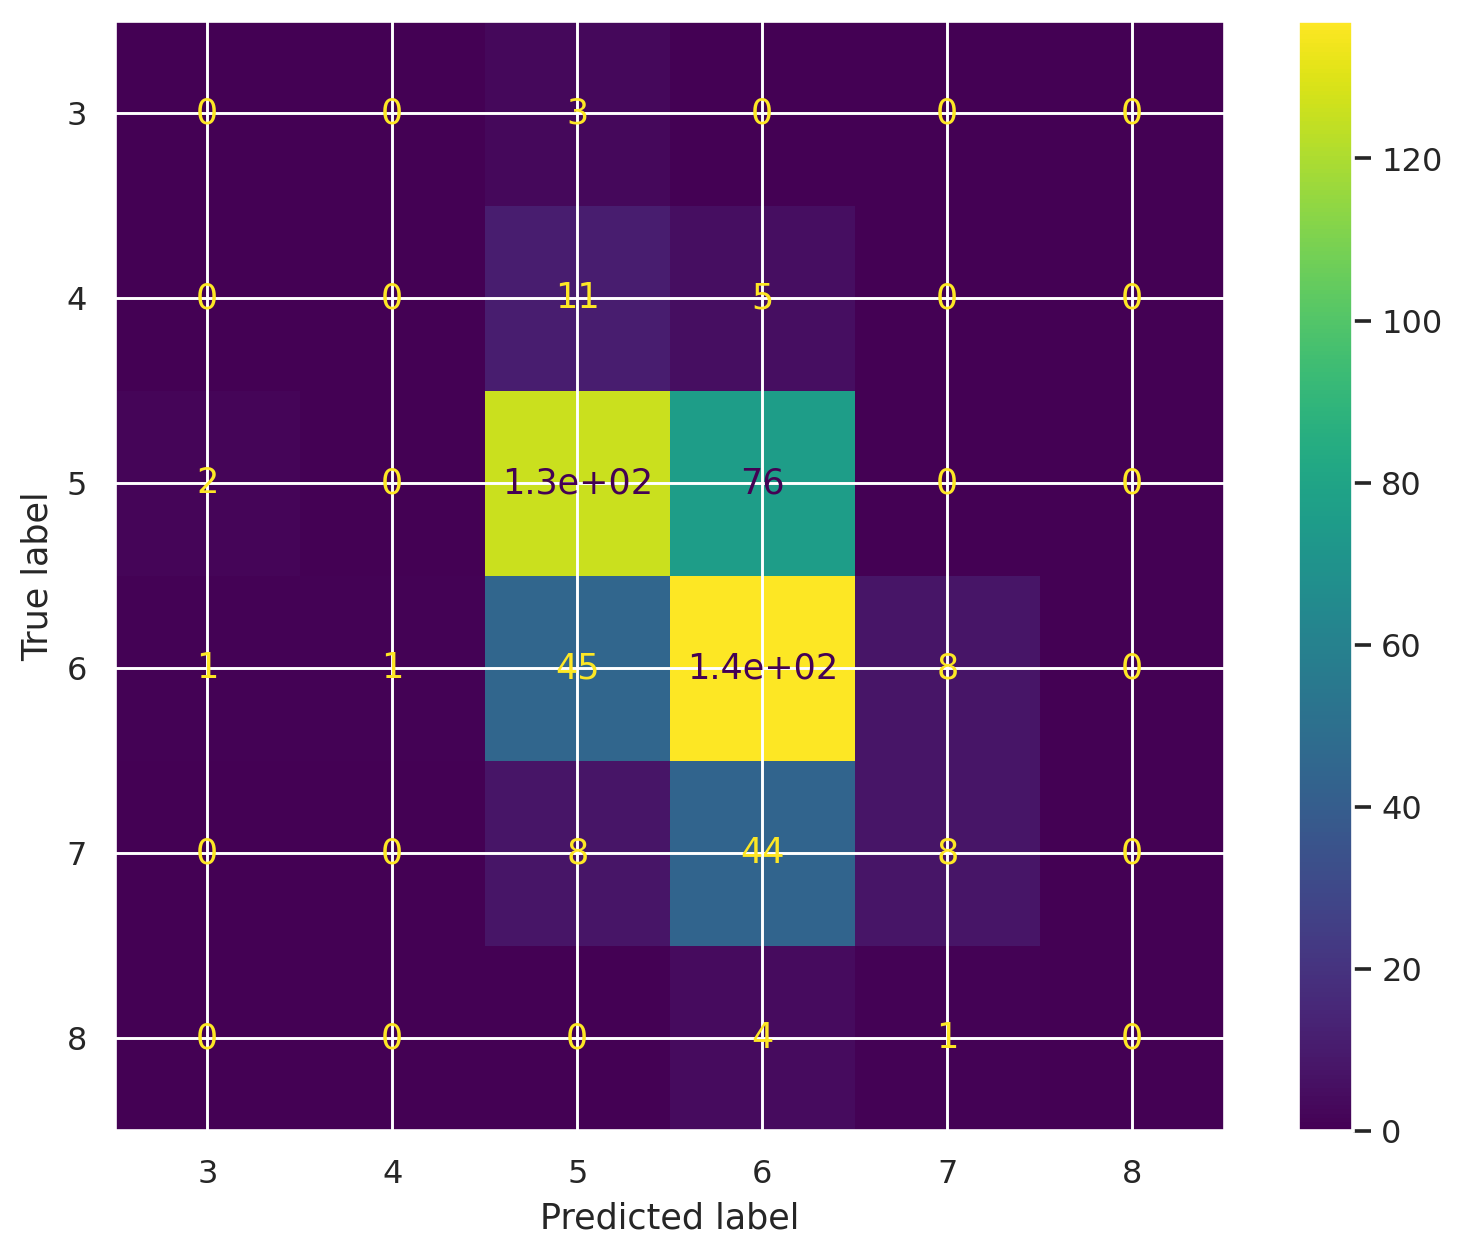

In [ ]:
metrics.plot_confusion_matrix(tree_grid_red, Xr_test,yr_test);

In [ ]:
names = []
for col in white.columns:
    names.append(col)
names = names[:11]


In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree_best, out_file="tree.dot", class_names=['3','4','5','6','7','8'],feature_names=names,impurity=False, filled=True)

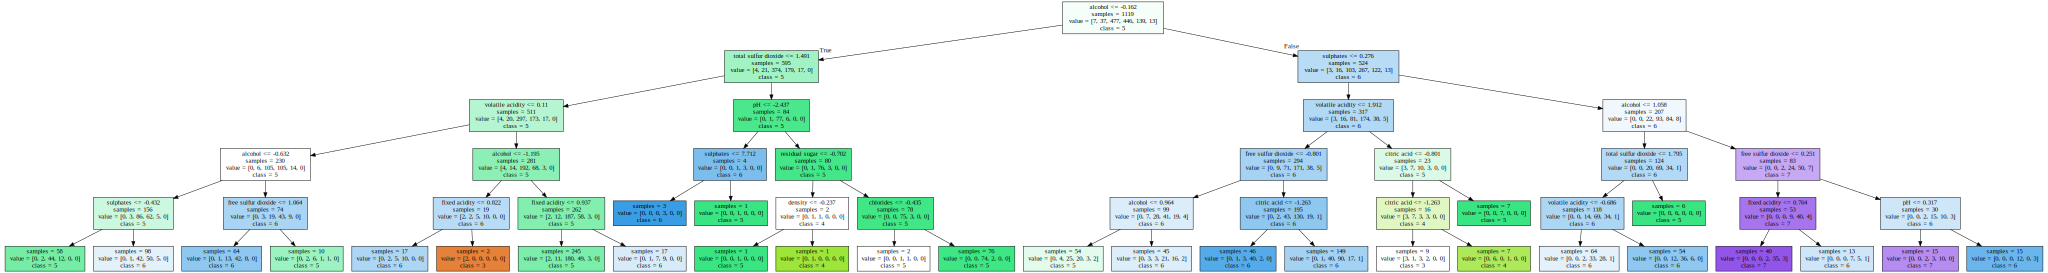

In [ ]:
import graphviz

with open("tree.dot") as f:dot_graph = f.read()
display(graphviz.Source(dot_graph))

### **5.1.2 White wine** 

In [ ]:
tree_grid_white = GridSearchCV(tree, param_grid= params, cv = 5)
tree_grid_white.fit(Xw_train, yw_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=14,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
tree_best_white = tree_grid_white.best_estimator_
importance_white = tree_grid_white.best_estimator_.feature_importances_

yw_predict = tree_grid_white.predict(Xw_test)
white_accuracy = metrics.accuracy_score(yw_test,yw_predict)

print('La exactitud en el conjunto de validación para el mejor clasificador de vinos rojos fue {}'.format(round(tree_grid_white.best_score_,4)))

print('La exactitud en el conjunto de prueba para el mejor clasificador de vinos rojos fue {}'.format(round(white_accuracy,4)))

La exactitud en el conjunto de validación para el mejor clasificador de vinos rojos fue 0.5385
La exactitud en el conjunto de prueba para el mejor clasificador de vinos rojos fue 0.5415


In [ ]:
tree_white = pd.DataFrame(tree_grid_white.cv_results_)
tree_white.nlargest(5,'mean_test_score')

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
86        0.013162      0.000120  ...        0.004933                1
67        0.013417      0.001164  ...        0.018214                2
85        0.011594      0.000099  ...        0.022192                3
177       0.027552      0.001893  ...        0.019843                4
59        0.012234      0.001032  ...        0.021053                5

[5 rows x 16 columns]

### Matriz de confusión

Se observa en la matriz de confusión que el clasificador se desempeña de manera no ideal al clasificar mal los valores extremos de la distribución, adicionalmente dentro del conjunto de prueba habían solamente 20 muestras de baja calidad y 14 de alta. Respecto a calidades medias se observa que el modelo tiene un desempeño mediocre al intentar distinguir entre calidades muy cercanas, sin embargo diferencia bien entre calidades bajas, de las medias y de las altas.

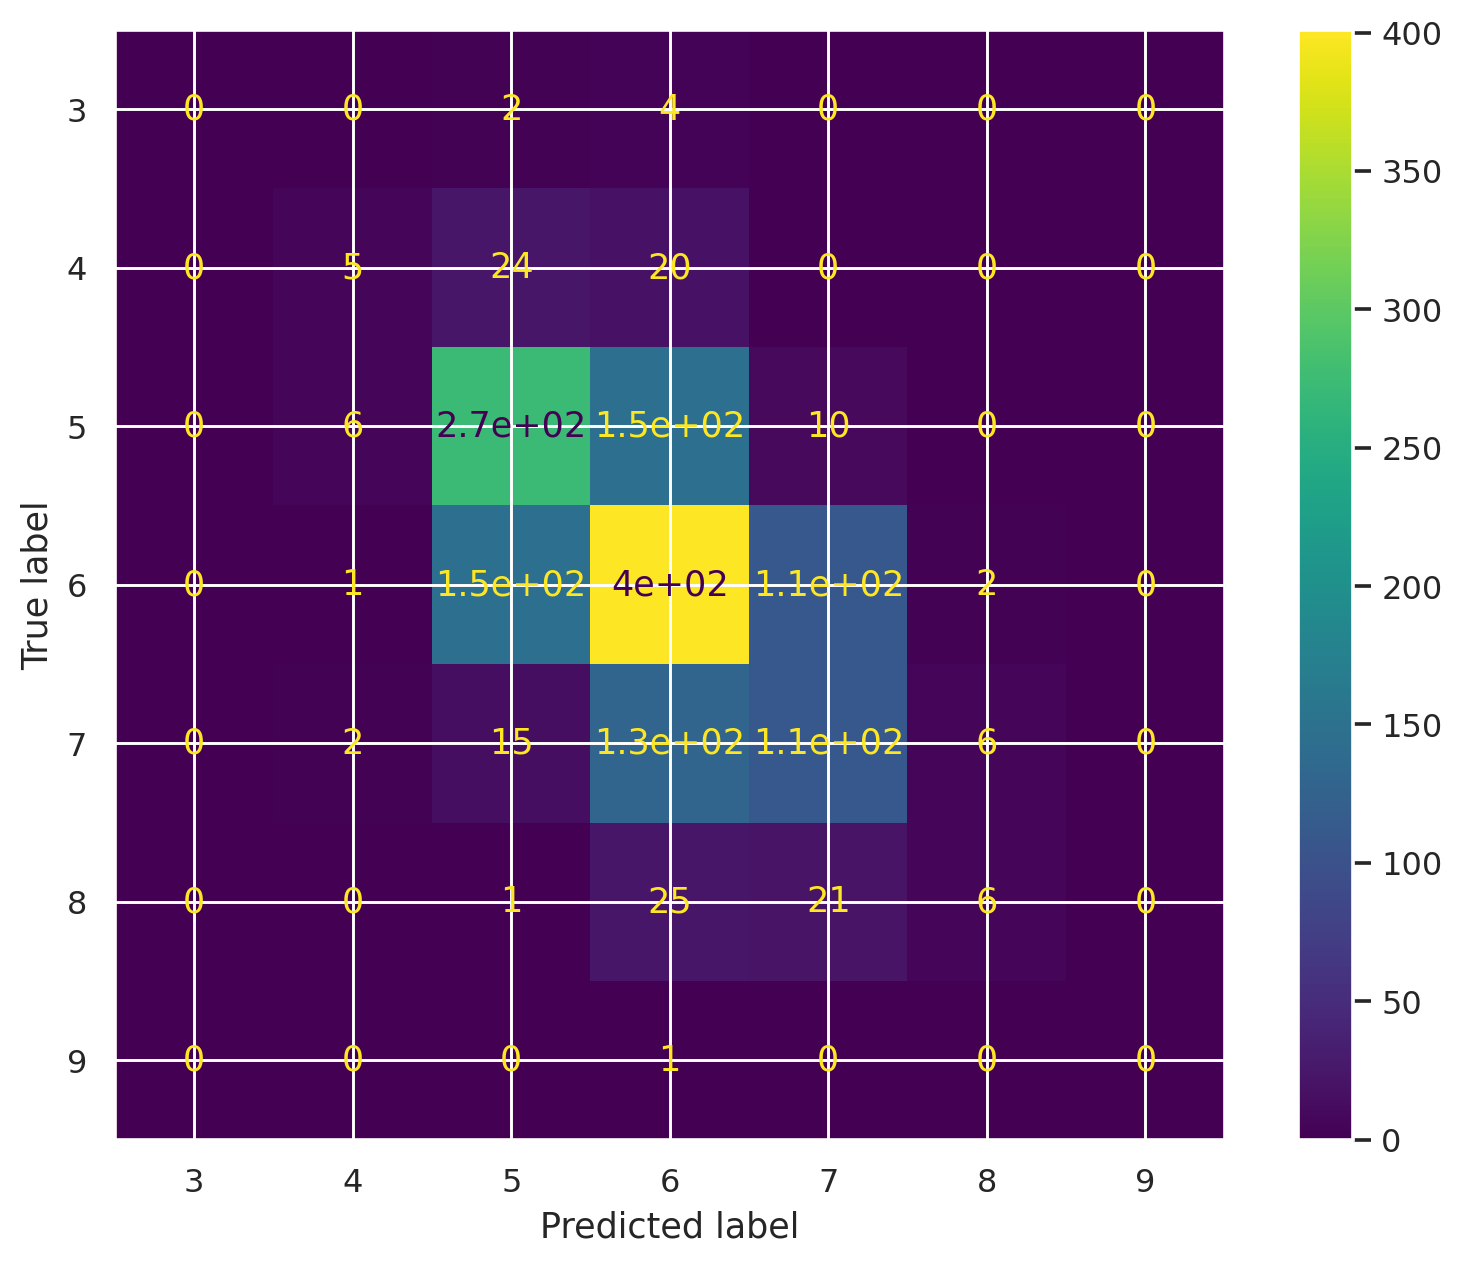

In [ ]:
metrics.plot_confusion_matrix(tree_grid_white.best_estimator_, Xw_test,yw_test)
plt.show()  

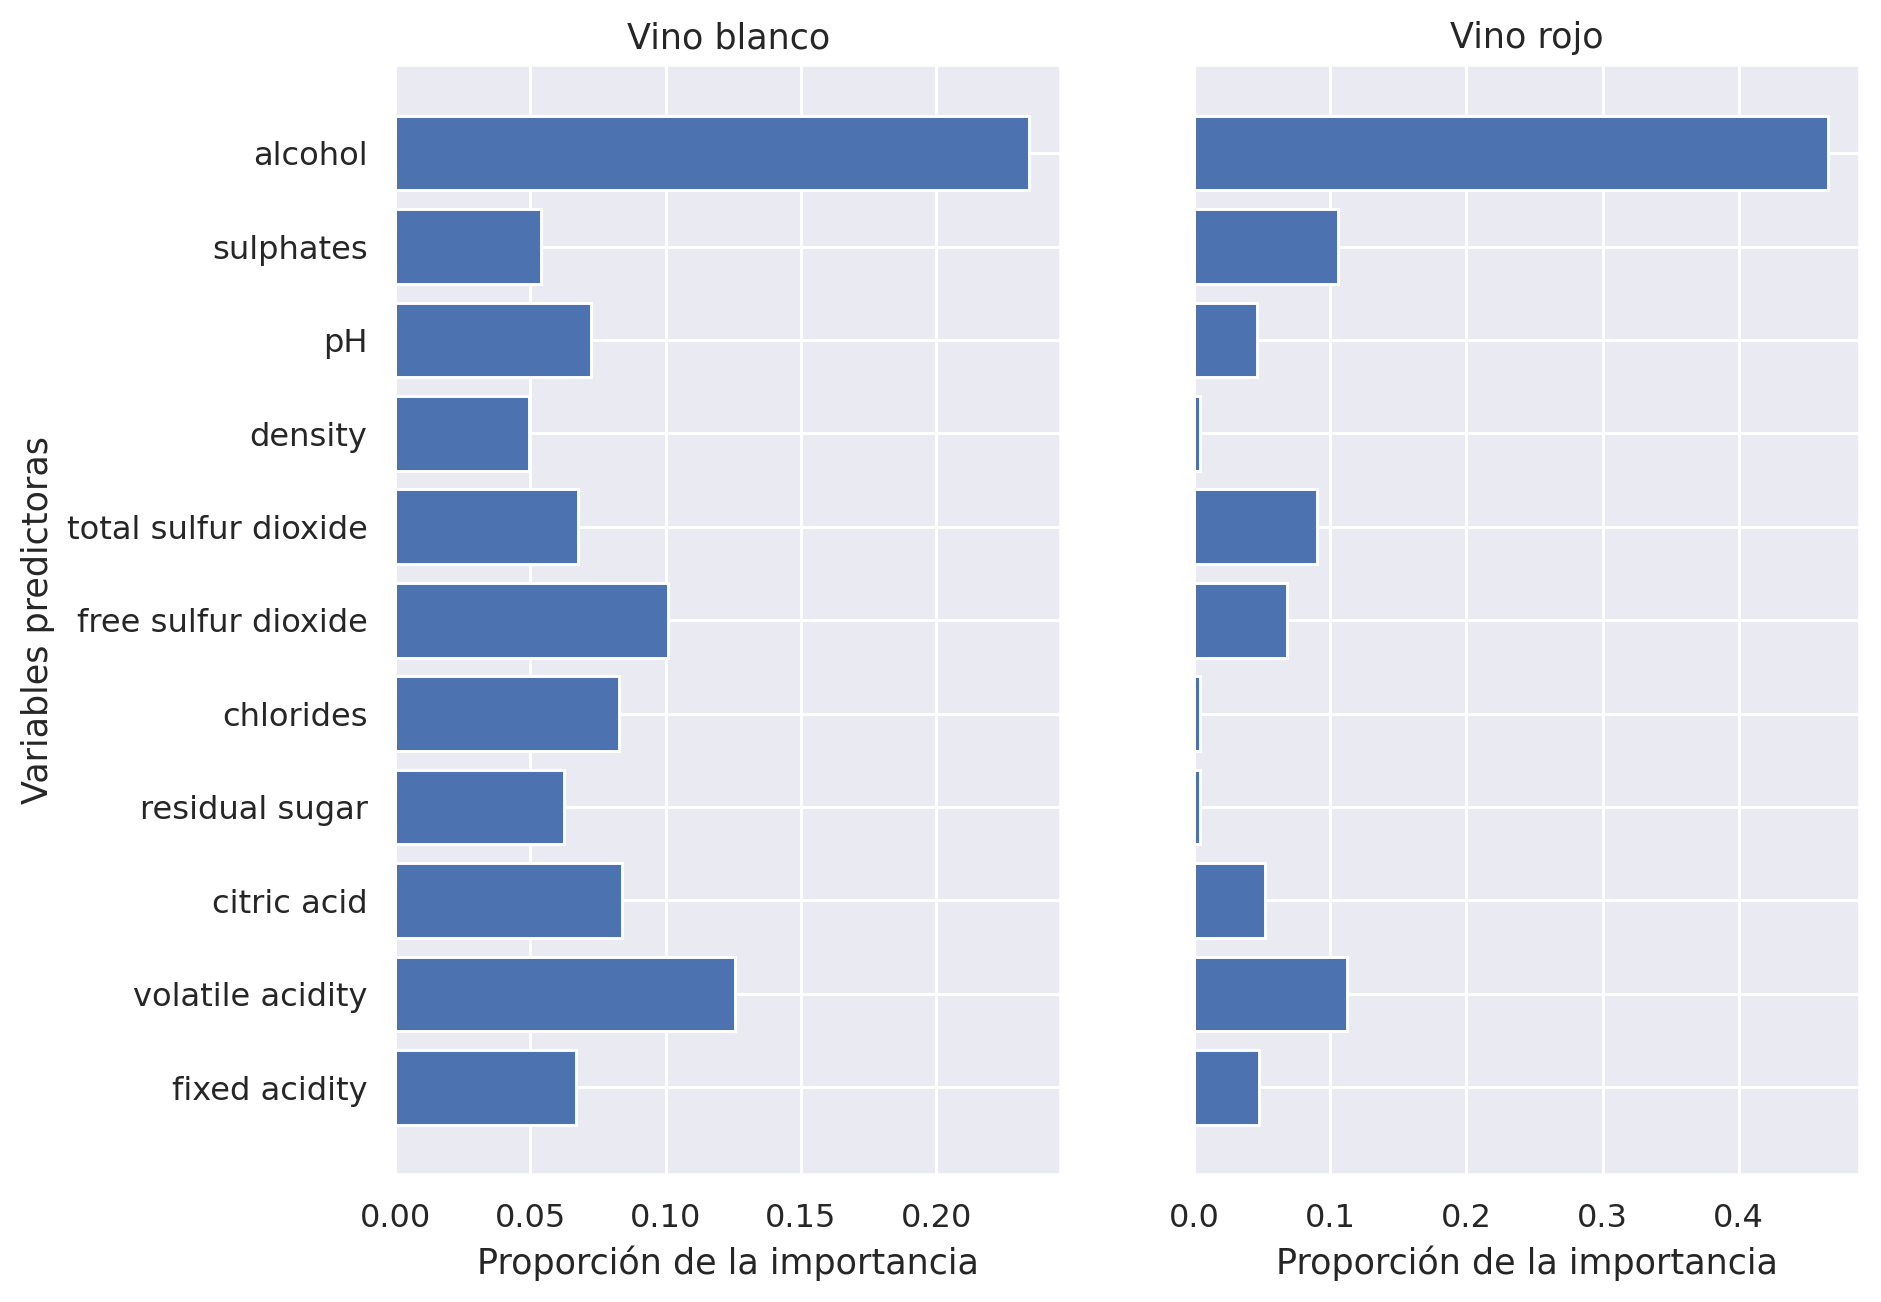

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True)
axs[0].set(xlabel='Proporción de la importancia', ylabel='Variables predictoras',title = 'Vino blanco')
axs[1].set(xlabel='Proporción de la importancia',title = 'Vino rojo')
axs[0].barh(names, importance_white)
axs[1].barh(names, importance_red)
plt.show();

##**5.2 Máquinas de vectores de soporte (*SVM*)**
---
Las máquinas de vectores de soporte son un modelo de aprendizaje supervisado en el cual se busca representar a los ejemplos en un nuevo espacio, de tal forma que a aquellos ejemplos de diferentes categorías sea posible, en principio, separarlos linealmente en este nuevo espacio.

#### **5.2.2. Kernel Gaussiano `red`**
---

Otro kernel muy importante es el **_kernel_ gaussiano**. Este está definido por la siguiente función:
$$
K(x, x') = \exp\left(-\frac{\|x-x'\|^2}{2\sigma^2}\right)
$$
la cual se puede simplificar como
$$
K(x, x') = \exp(-\gamma \|x-x'\|^2)
$$
$$
\gamma \ = \frac{1}{2\sigma^2}
$$
En la literatura este método también se encuentra como *kernel* usando una función de base radial (**RBF** por del ingles *Radial basis function*).

Para implementar un clasificador de vectores de soporte con un *kernel* gaussiano podemos utilizar el constructor de clasificadores basados en máquinas de soporte general **`sklearn.SVC`**. Esta es una versión general de este tipo de clasificador, que acepta distintos argumentos para definir el método deseado. 

En el siguiente ejemplo probamos con un valor pequeño del argumento $\gamma$ (**`gamma`**):

In [ ]:
#Clasificador de vectores de soporte general.
from sklearn.svm import SVC        

rbf_svm = SVC(kernel='rbf',   # Kernel de tipo RBF
              gamma = 0.001)  # Valor del argumento gamma

rbf_svm.fit(Xr_train, yr_train);

In [ ]:
# Los hiperparámetros deben estar en forma de diccionario.
param_grid = {'C':     [2**i for i in range(-3, 3, 1)], 
              'gamma': [2**i for i in range(-2, 2, 1)]}

param_grid

{'C': [0.125, 0.25, 0.5, 1, 2, 4], 'gamma': [0.25, 0.5, 1, 2]}

In [ ]:
# Búsqueda en cuadrícula de hiperparámetros.
from sklearn.model_selection import GridSearchCV 

grid_clf = GridSearchCV(SVC(kernel='rbf'), 
                   param_grid=param_grid,
                   cv = 5, 
                   verbose=1, 
                   return_train_score=True
                   )

grid_clf.fit(Xr_train, yr_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.125, 0.25, 0.5, 1, 2, 4],
                         'gamma': [0.25, 0.5, 1, 2]},
             return_train_score=True, verbose=1)

In [ ]:
# Mejores parámetros identificados.
print(grid_clf.best_params_)

{'C': 1, 'gamma': 0.5}


In [ ]:
# Puntaje de la mejor combinación de parámetros.
print(grid_clf.best_score_)

0.633612267777066


In [ ]:
grid_clf.score(Xr_train, yr_train)

0.839142091152815

In [ ]:
grid_clf.score(Xr_test, yr_test)

0.6229166666666667

#### **5.2.3. Kernel Gaussiano `white`**
---


In [ ]:
#Clasificador de vectores de soporte general.
from sklearn.svm import SVC        

rbf_svm = SVC(kernel='rbf',   # Kernel de tipo RBF
              gamma = 0.001)  # Valor del argumento gamma

rbf_svm.fit(Xw_train, yw_train);

In [ ]:
# Los hiperparámetros deben estar en forma de diccionario.
param_grid = {'C':     [2**i for i in range(-2, 2, 1)], 
              'gamma': [2**i for i in range(-1, 1, 1)]}

param_grid

In [ ]:
# Búsqueda en cuadrícula de hiperparámetros.
from sklearn.model_selection import GridSearchCV 

grid_clf = GridSearchCV(SVC(kernel='rbf'), 
                   param_grid=param_grid,
                   cv = 5, 
                   verbose=1, 
                   return_train_score=True
                   )

grid_clf.fit(Xw_train, yw_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.125, 0.25, 0.5, 1, 2, 4],
                         'gamma': [0.25, 0.5, 1, 2]},
             return_train_score=True, verbose=1)

In [ ]:
# Mejores parámetros identificados.
print(grid_clf.best_params_)

{'C': 2, 'gamma': 1}


In [ ]:
# Puntaje de la mejor combinación de parámetros.
print(grid_clf.best_score_)

0.6099780809091102


In [ ]:
grid_clf.score(Xw_train, yw_train)

0.98512252042007

In [ ]:
grid_clf.score(Xw_test, yw_test)

0.6687074829931973

# **5.3 Redes Neuronales**

## **5.3.1 Red Wine**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

mlp = MLPClassifier(random_state = 14)

params = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'hidden_layer_sizes' : [(20,), (40,), (80,)],
    "max_iter": [1000,10000,100000],
    'solver': ['adam','lbfgs','sgd']
}

mlp_red = RandomizedSearchCV(mlp, param_distributions = params,cv=5,verbose=1,random_state = 14,n_iter=10)
mlp_red.fit(Xr_train,yr_train)


In [ ]:
mlp_red2 = RandomizedSearchCV(mlp, param_distributions = params,cv=5,verbose=1,random_state = 25,n_iter=10) #Cambiando semilla para tener mayores opciones
mlp_red2.fit(Xr_train,yr_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           validation_fraction=0.1,
                                           verbose=False, warm_start=False),
                   iid='deprecated

In [ ]:
print(mlp_red.best_score_)
print(mlp_red.best_params_)

0.6130325112107624
{'solver': 'adam', 'max_iter': 10000, 'hidden_layer_sizes': (80,), 'activation': 'logistic'}


In [ ]:
print(mlp_red2.best_score_)
print(mlp_red2.best_params_)

0.6291399743754005
{'solver': 'adam', 'max_iter': 1000, 'hidden_layer_sizes': (80,), 'activation': 'relu'}


In [ ]:
yr_predict_mlp = mlp_red2.predict(Xr_test)
red_accuracy = metrics.accuracy_score(yr_test,yr_predict_mlp)

print('La exactitud en el conjunto de validación para el mejor clasificador de vinos rojos fue {}'.format(round(mlp_red2.best_score_,4)))
print('\nLa exactitud en el conjunto de prueba para el mejor clasificador de vinos rojos fue {}'.format(round(red_accuracy,4)))
print('\nLa mejor combinación de parametros encontrados fue {}'.format(mlp_red2.best_params_))

La exactitud en el conjunto de validación para el mejor clasificador de vinos rojos fue 0.6291

La exactitud en el conjunto de prueba para el mejor clasificador de vinos rojos fue 0.6021

La mejor combinación de parametros encontrados fue {'solver': 'adam', 'max_iter': 1000, 'hidden_layer_sizes': (80,), 'activation': 'relu'}


## **5.3.2 White Wine**

In [ ]:
mlp_white = RandomizedSearchCV(mlp, param_distributions = params,cv=5,verbose=0,random_state = 14,n_iter=10)

mlp_white.fit(Xw_train,yw_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           validation_fraction=0.1,
                                           verbose=False, warm_start=False),
                   iid='deprecated

In [ ]:
yw_predict_mlp = mlp_white.predict(Xw_test)
white_accuracy = metrics.accuracy_score(yw_test,yw_predict_mlp)

print('La exactitud en el conjunto de validación para el mejor clasificador de vinos blancos fue {}'.format(round(mlp_white.best_score_,4)))
print('\nLa exactitud en el conjunto de prueba para el mejor clasificador de vinos blancos fue {}'.format(round(white_accuracy,4)))
print('\nLa mejor combinación de parametros encontrados fue {}'.format(mlp_white.best_params_))

La exactitud en el conjunto de validación para el mejor clasificador de vinos blancos fue 0.5645

La exactitud en el conjunto de prueba para el mejor clasificador de vinos blancos fue 0.5605

La mejor combinación de parametros encontrados fue {'solver': 'lbfgs', 'max_iter': 100000, 'hidden_layer_sizes': (80,), 'activation': 'relu'}


In [ ]:
cv_white_mlp  = pd.DataFrame(mlp_white.cv_results_)
cv_white_mlp.nlargest(5,'mean_test_score')

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0     148.745761      0.716085  ...        0.021824                1
9      49.088797      5.997226  ...        0.013700                2
4      17.772003      3.991407  ...        0.022194                3
7       4.579838      0.678772  ...        0.009914                4
3       9.070138      0.669848  ...        0.010639                5

[5 rows x 17 columns]

# **6. Conclusiones**

Resumen de resultados para red wine

|   |  Árbol de decisión |  Máquina de Soporte Vectorial | Perceptron Multicapa  |
|---|---|---|---|
| Exactitud promedio en conjunto de validación  | 0.6068  | 0.6336 | 0.6291  |
| Exactitud en conjunto de prueba |  0.5646 | 0.6229  |  0.6021 |


Resumen de resultados para white wine

|   |  Árbol de decisión |  Máquina de Soporte Vectorial | Perceptron Multicapa  |
|---|---|---|---|
| Exactitud promedio en conjunto de validación  |0.5385  | 0.6099  | 0.5644  |
| Exactitud en conjunto de prueba |  0.5415 | 0.6687  | 0.5605  |


Se entrenaron 6 modelos para cada tipo de vino, se empleó validación cruzada con 5 pliegues combinada con busqueda de los mejores hiperparámetros empleando ´GridSearchCV´ excepto en el caso del Perceptron multicapa donde se empleo Randomized Search CV dados los largos tiempos de entrenamiento de los modelos. 

En ambos casos el modelo que mostró mejores resultados fue el obtenido a través de máquinas de soporte vectorial, cabe aclarar que el desempeño de todos los modelos desarrollados fue bajo, sin embargo es consecuente con los resultados reportados por Cortez et al., en 2009, donde las máquinas de soporte vectorial se desempeñaron apenas mejor que las redes neuronales alcanzando una exactitud de 0.624.

Es necesario evaluar los modelos obtenidos en este proyecto con niveles de tolerancia más altos como los empleados por Cortez. Adicionalmente podría ser de utilidad generar una nueva variable predictora discretizando la variable quality para obtener 3 categorías, calidad baja, calidad media y calidad alta.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2fc850b7-d852-4d8a-9104-f0944faeed3b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>